In [1]:
#kütüphanelerin eklenmesi
import tensorflow as tf
import librosa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa.display

#ses verisini oynatmak için
import IPython.display as ipd

#görüntü işleme için
import cv2
from google.colab.patches import cv2_imshow

#verileri bölmek için
from sklearn.model_selection import train_test_split

In [2]:
#listeler
goruntu = []
etiket = []

liste_ekleme = []
liste_ikili = []

In [3]:
#veri seti indirme
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
!tar -xvf /content/UrbanSound8K.tar.gz

Görüntülenen çıkış son 5000 satıra kısaltıldı.
UrbanSound8K/audio/fold4/17480-2-0-6.wav
UrbanSound8K/audio/fold4/17480-2-0-9.wav
UrbanSound8K/audio/fold4/175904-2-0-11.wav
UrbanSound8K/audio/fold4/175904-2-0-24.wav
UrbanSound8K/audio/fold4/176003-1-0-0.wav
UrbanSound8K/audio/fold4/176638-5-0-0.wav
UrbanSound8K/audio/fold4/177756-2-0-10.wav
UrbanSound8K/audio/fold4/177756-2-0-4.wav
UrbanSound8K/audio/fold4/177756-2-0-5.wav
UrbanSound8K/audio/fold4/177756-2-0-7.wav
UrbanSound8K/audio/fold4/179862-1-0-0.wav
UrbanSound8K/audio/fold4/180977-3-1-1.wav
UrbanSound8K/audio/fold4/180977-3-1-5.wav
UrbanSound8K/audio/fold4/183989-3-1-21.wav
UrbanSound8K/audio/fold4/183989-3-1-23.wav
UrbanSound8K/audio/fold4/185709-0-0-0.wav
UrbanSound8K/audio/fold4/185709-0-0-1.wav
UrbanSound8K/audio/fold4/185709-0-0-6.wav
UrbanSound8K/audio/fold4/185709-0-0-7.wav
UrbanSound8K/audio/fold4/185909-2-0-102.wav
UrbanSound8K/audio/fold4/185909-2-0-13.wav
UrbanSound8K/audio/fold4/185909-2-0-17.wav
UrbanSound8K/audio/fol

In [4]:
#veri işleme
veri = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
className = veri.iloc[0:8000,7:]

veri1 = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
slice_name = veri1.iloc[0:8000,0:1]

veri2 = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
fold_name = veri2.iloc[0:8000,5:6]

veri3 = pd.read_csv('/content/UrbanSound8K/metadata/UrbanSound8K.csv')
classID_name = veri3.iloc[0:8000,6:7]

['100032-3-0-0.wav']
100032-3-0-0.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100032-3-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(7002,) 22050


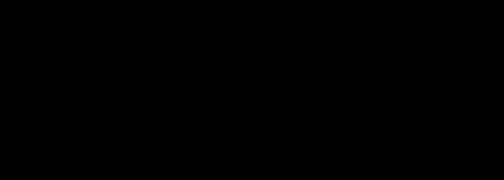

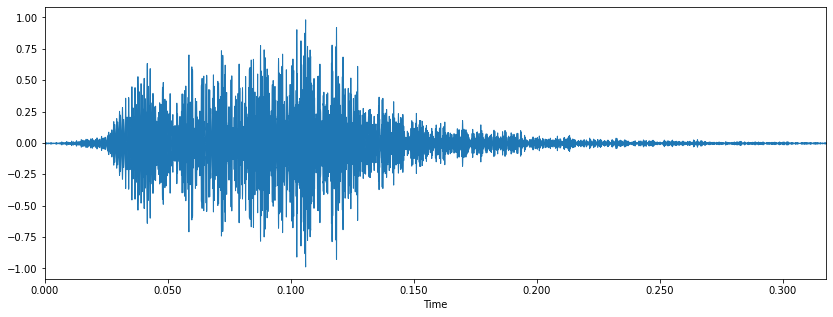

['100263-2-0-117.wav']
100263-2-0-117.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-117.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


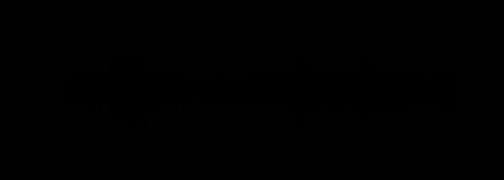

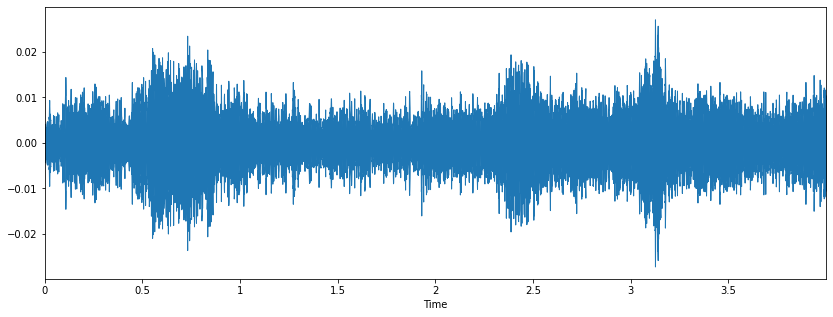

['100263-2-0-121.wav']
100263-2-0-121.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-121.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


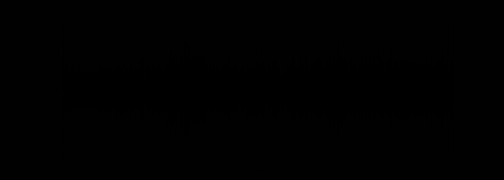

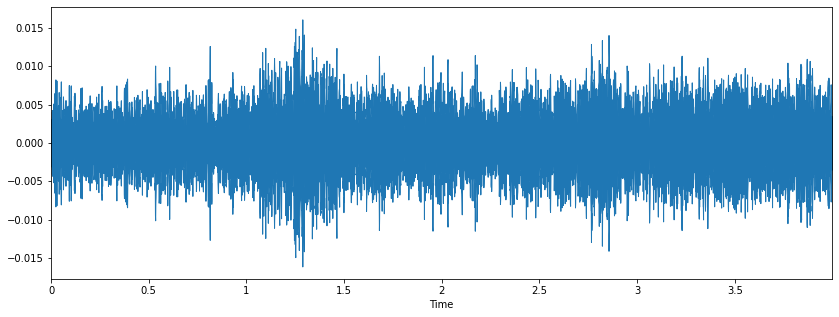

['100263-2-0-126.wav']
100263-2-0-126.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-126.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


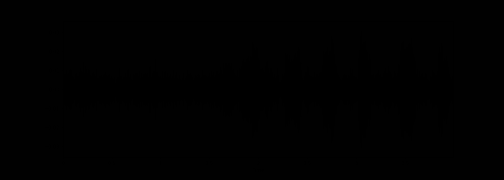

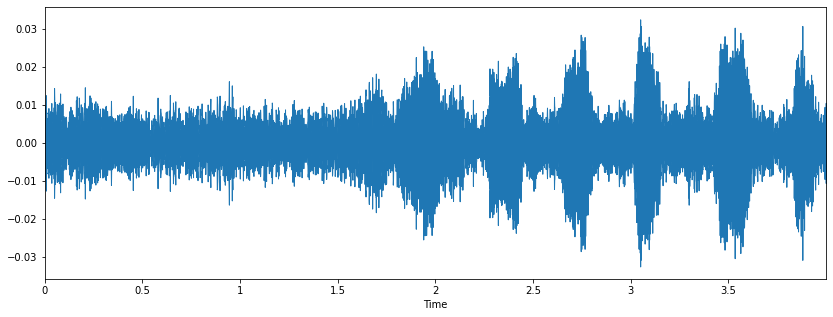

['100263-2-0-137.wav']
100263-2-0-137.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-137.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


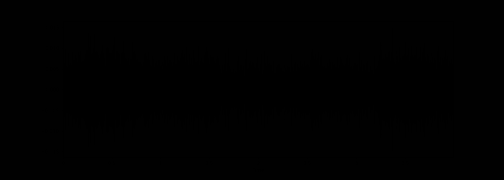

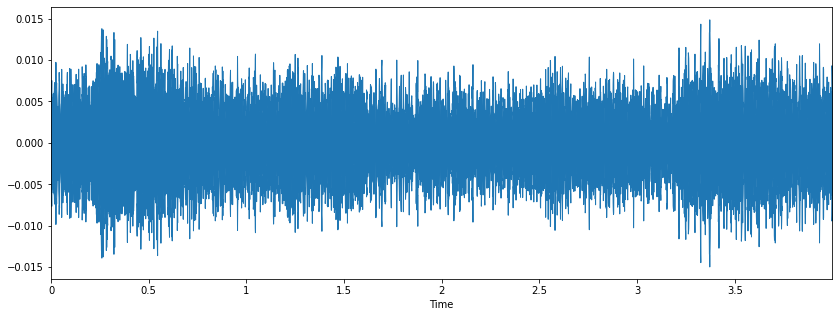

['100263-2-0-143.wav']
100263-2-0-143.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-143.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


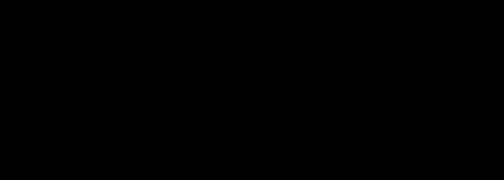

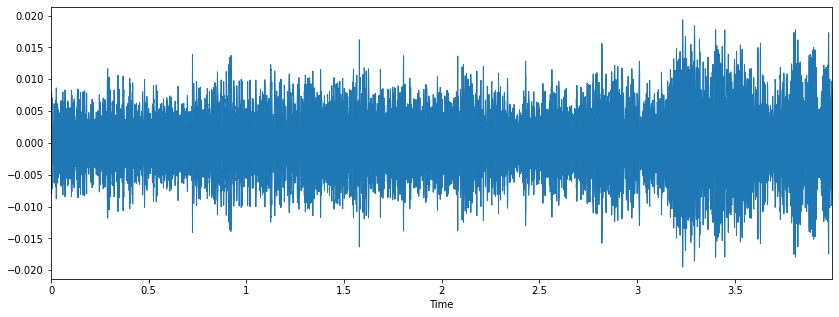

['100263-2-0-161.wav']
100263-2-0-161.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-161.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


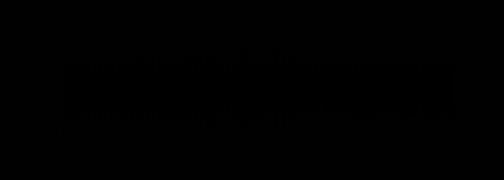

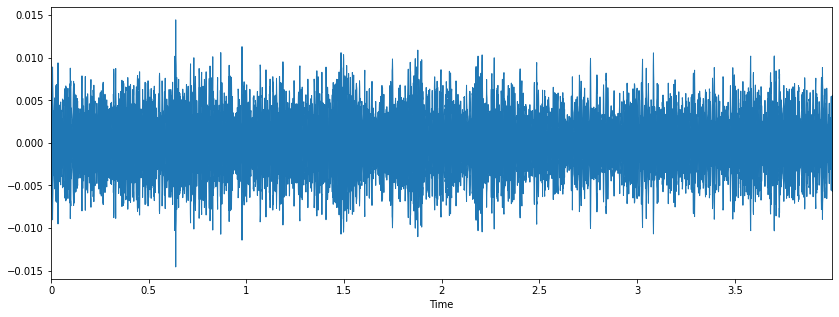

['100263-2-0-3.wav']
100263-2-0-3.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-3.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


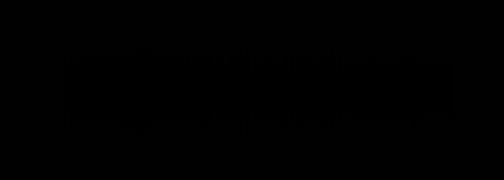

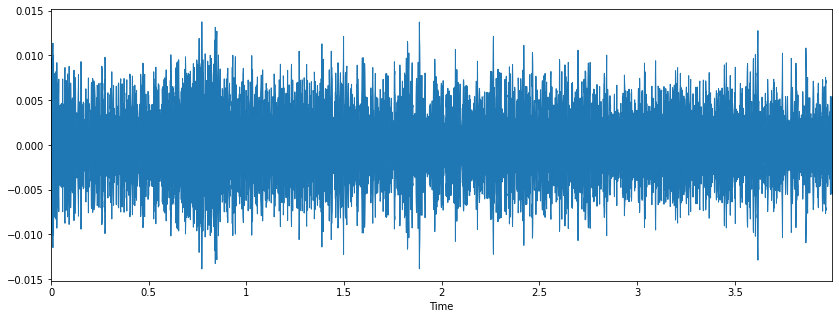

['100263-2-0-36.wav']
100263-2-0-36.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100263-2-0-36.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


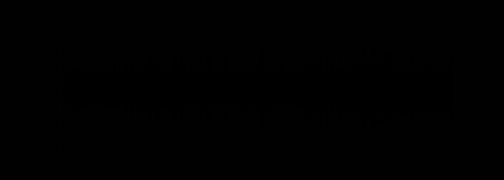

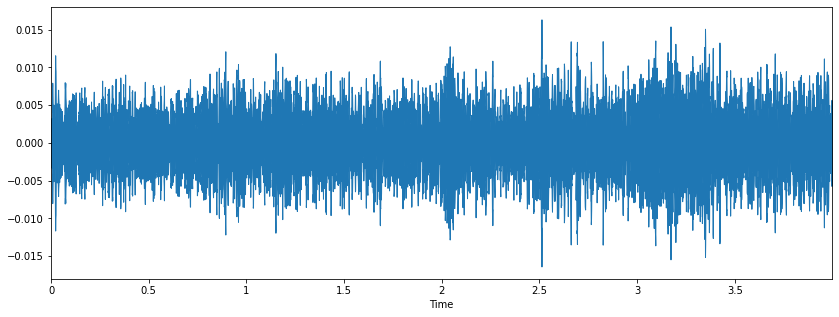

['100648-1-0-0.wav']
100648-1-0-0.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100648-1-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(14300,) 22050


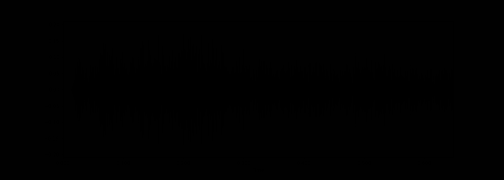

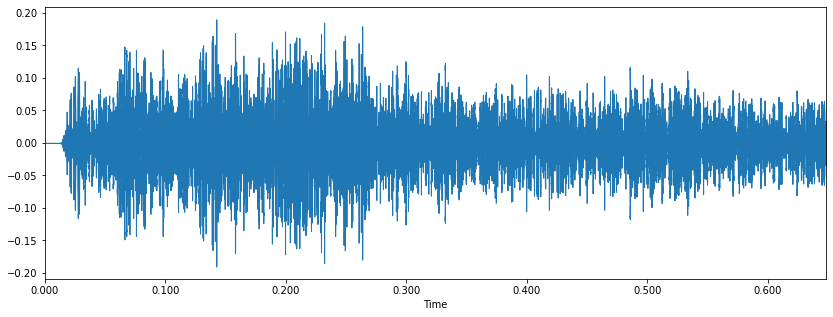

['100648-1-1-0.wav']
100648-1-1-0.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100648-1-1-0.wav
<class 'numpy.ndarray'> <class 'int'>
(23153,) 22050


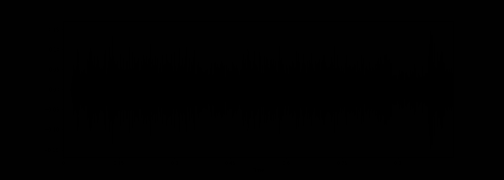

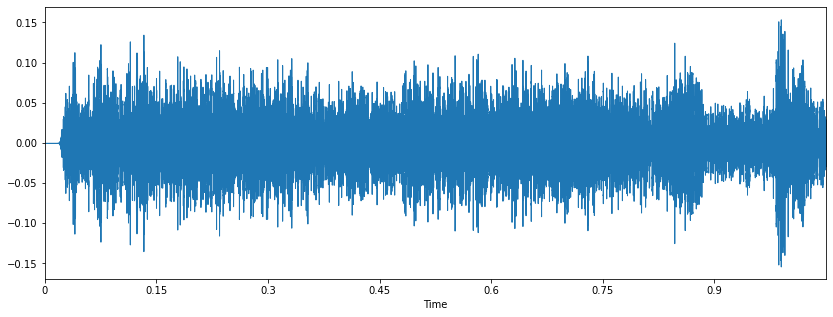

['100648-1-2-0.wav']
100648-1-2-0.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100648-1-2-0.wav
<class 'numpy.ndarray'> <class 'int'>
(8938,) 22050


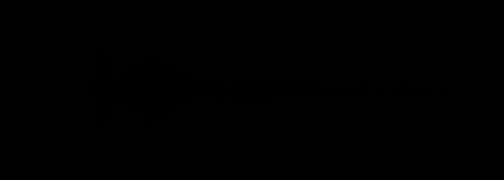

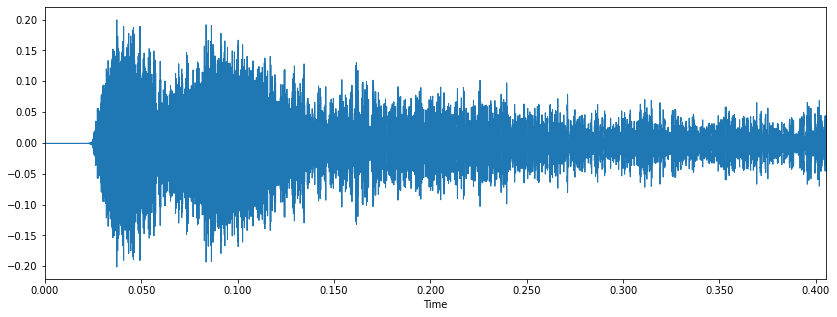

['100648-1-3-0.wav']
100648-1-3-0.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100648-1-3-0.wav
<class 'numpy.ndarray'> <class 'int'>
(35721,) 22050


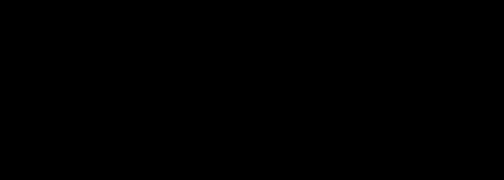

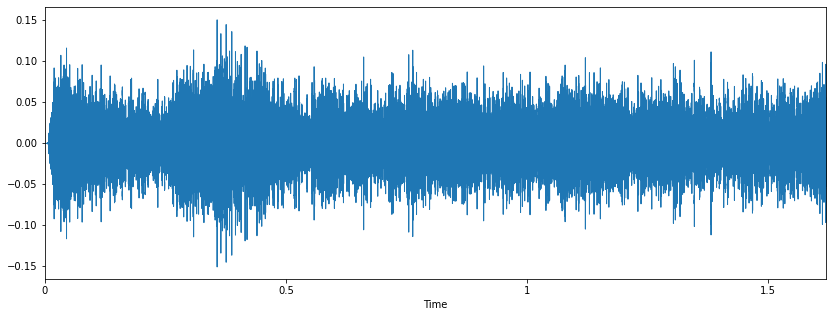

['100648-1-4-0.wav']
100648-1-4-0.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100648-1-4-0.wav
<class 'numpy.ndarray'> <class 'int'>
(41013,) 22050


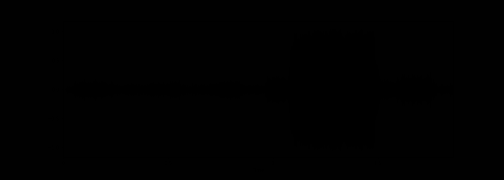

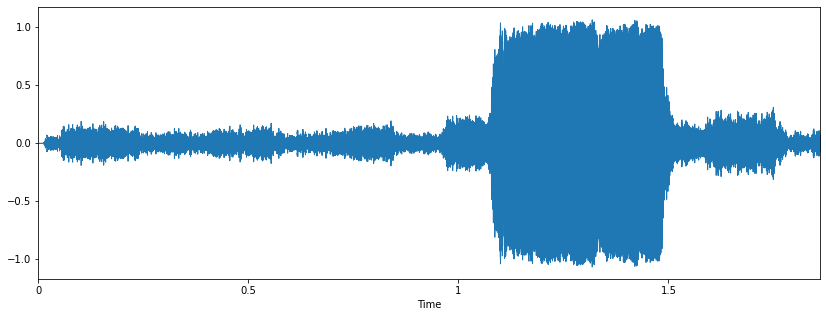

['100652-3-0-0.wav']
100652-3-0-0.wav
[2]
2
/content/UrbanSound8K/audio/fold2/100652-3-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


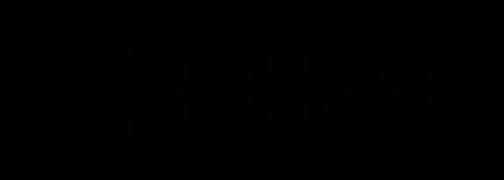

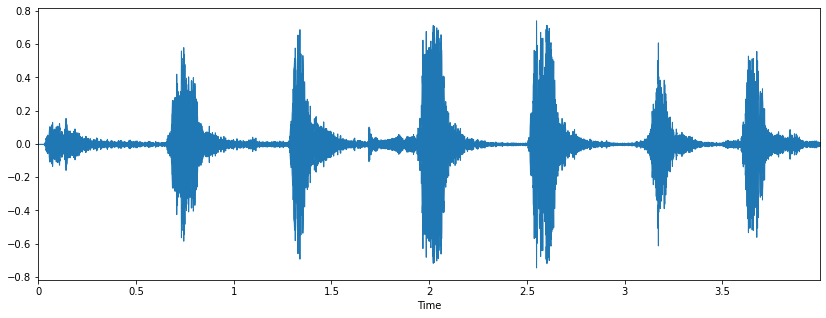

['100652-3-0-1.wav']
100652-3-0-1.wav
[2]
2
/content/UrbanSound8K/audio/fold2/100652-3-0-1.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


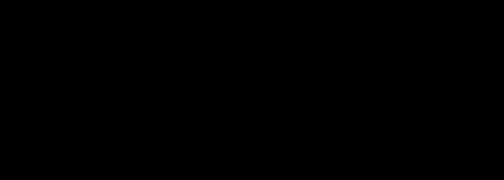

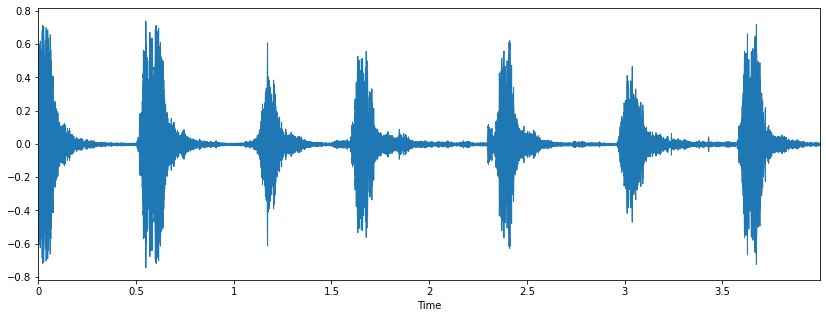

['100652-3-0-2.wav']
100652-3-0-2.wav
[2]
2
/content/UrbanSound8K/audio/fold2/100652-3-0-2.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


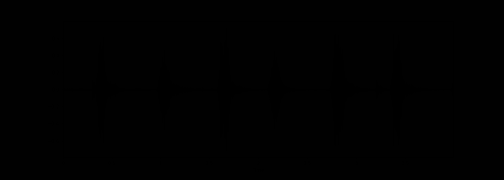

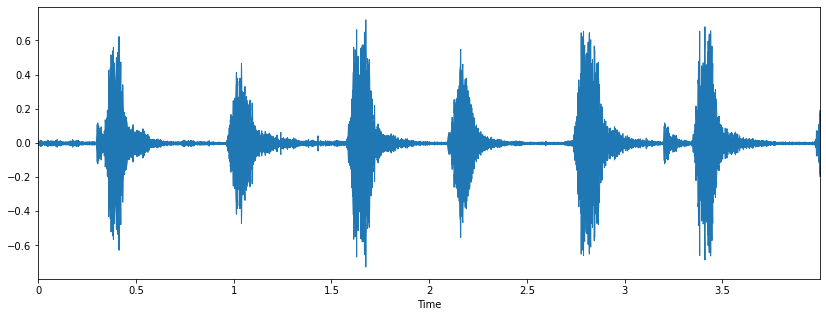

['100652-3-0-3.wav']
100652-3-0-3.wav
[2]
2
/content/UrbanSound8K/audio/fold2/100652-3-0-3.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


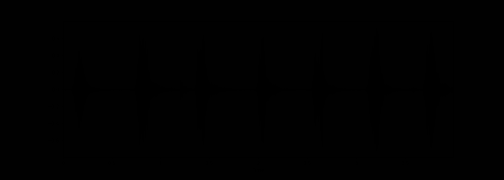

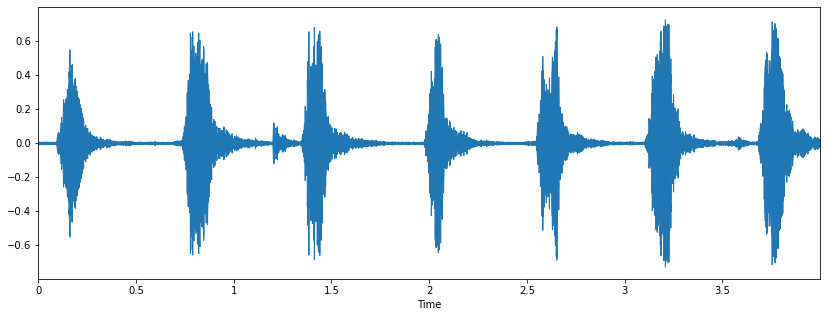

['100795-3-0-0.wav']
100795-3-0-0.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100795-3-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


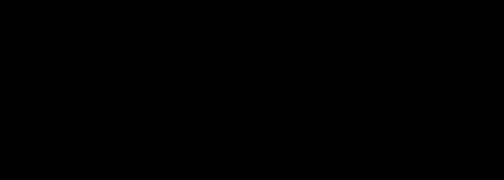

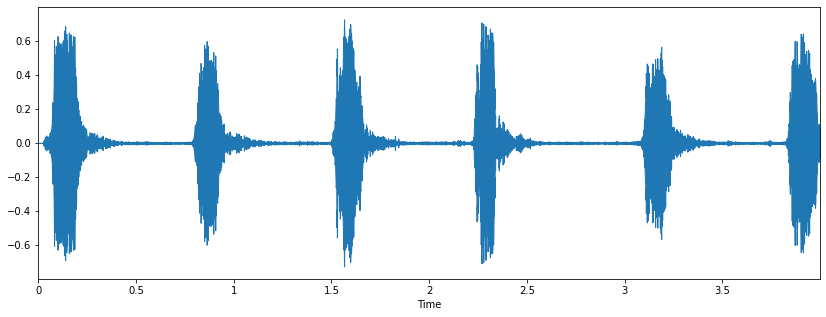

['100795-3-1-0.wav']
100795-3-1-0.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100795-3-1-0.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


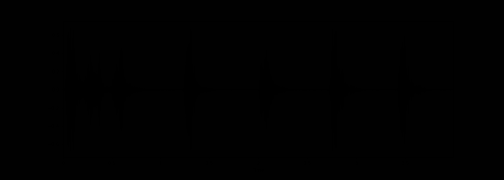

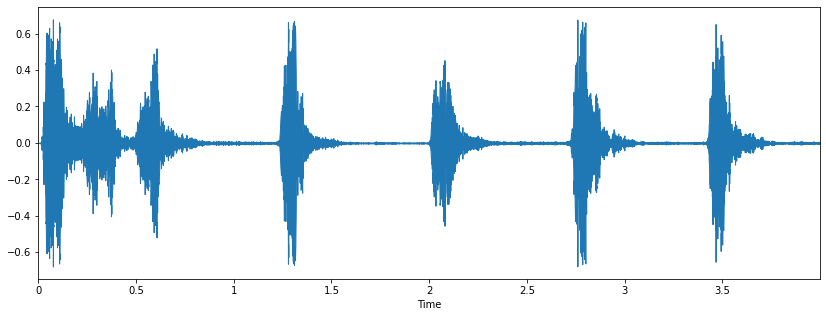

['100795-3-1-1.wav']
100795-3-1-1.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100795-3-1-1.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


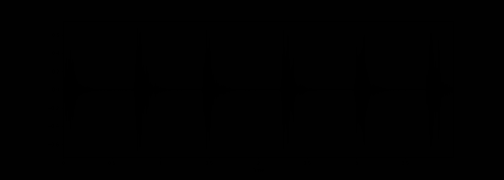

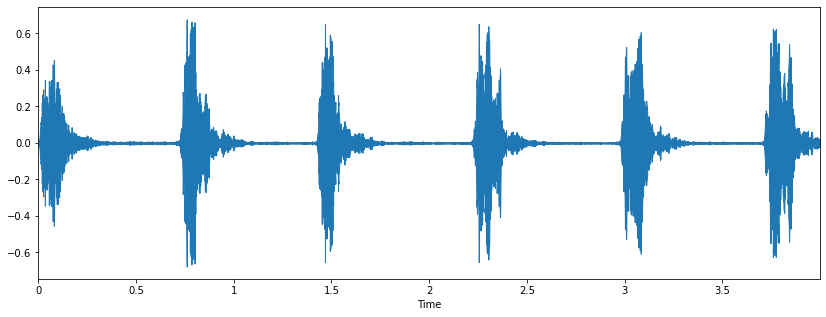

['100795-3-1-2.wav']
100795-3-1-2.wav
[10]
10
/content/UrbanSound8K/audio/fold10/100795-3-1-2.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


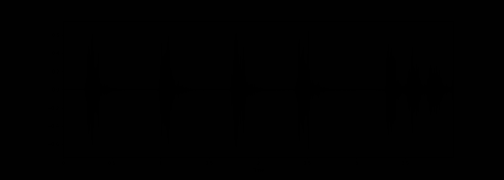

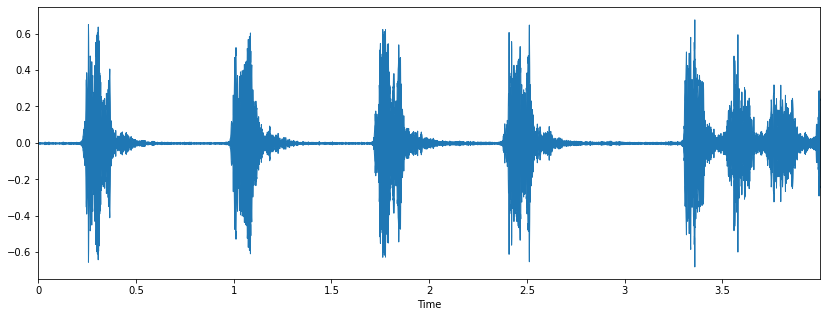

['100852-0-0-0.wav']
100852-0-0-0.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


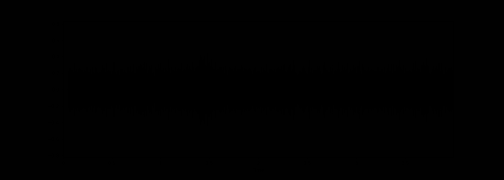

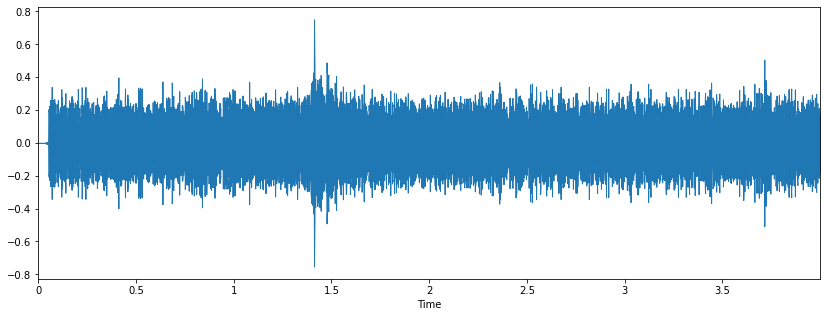

['100852-0-0-1.wav']
100852-0-0-1.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-1.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


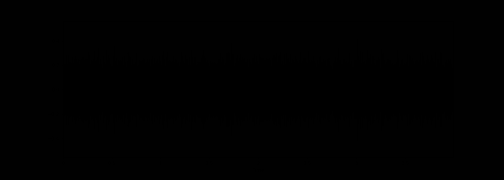

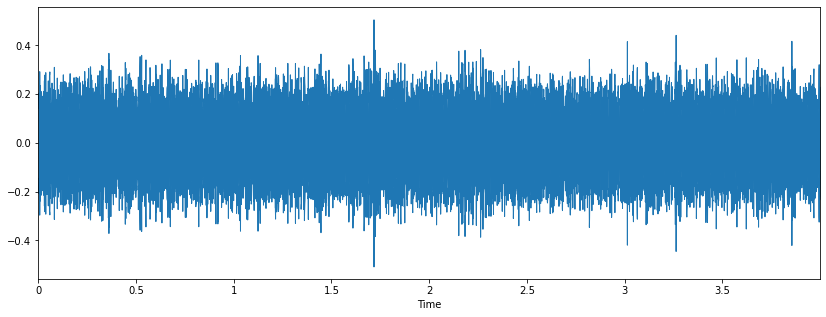

['100852-0-0-10.wav']
100852-0-0-10.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-10.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


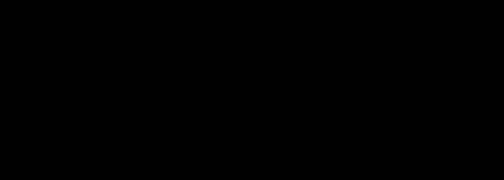

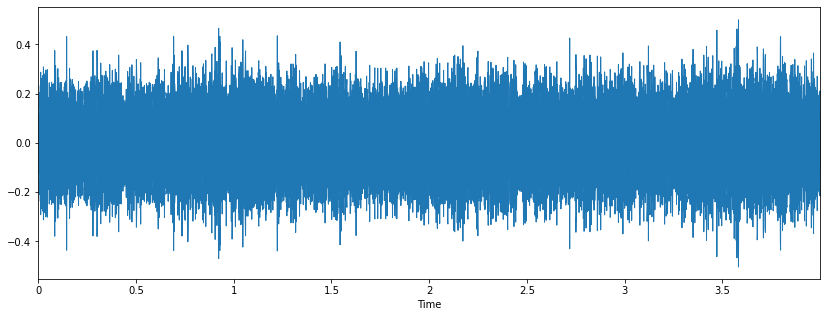

['100852-0-0-11.wav']
100852-0-0-11.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-11.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


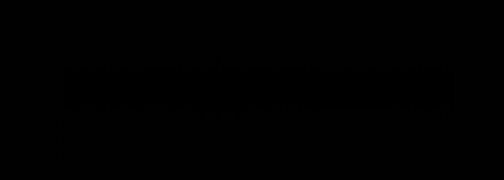

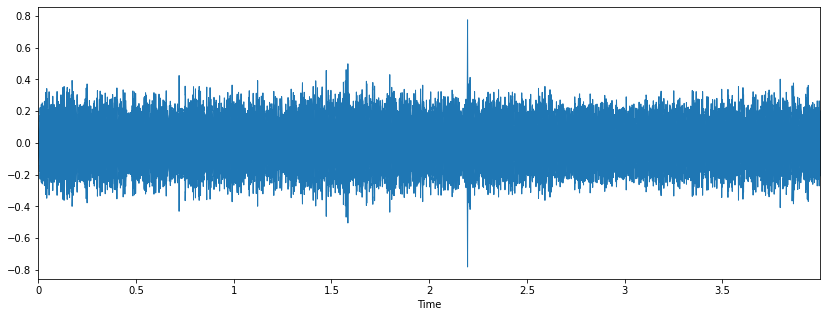

['100852-0-0-12.wav']
100852-0-0-12.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-12.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


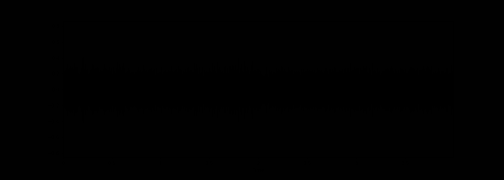

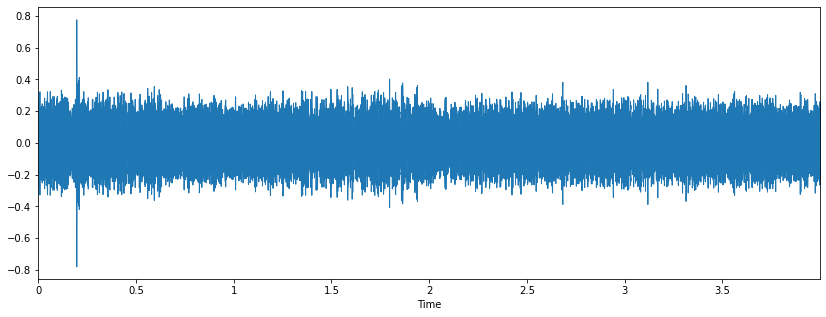

['100852-0-0-13.wav']
100852-0-0-13.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-13.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


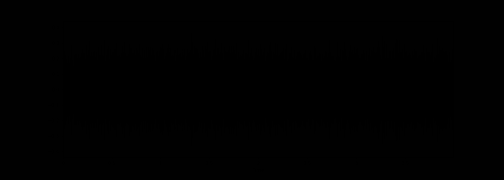

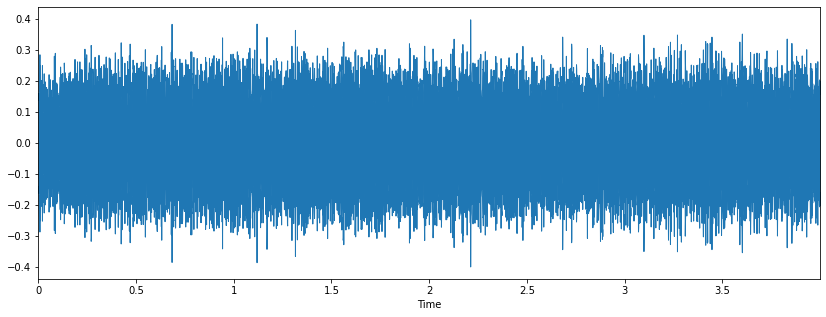

['100852-0-0-14.wav']
100852-0-0-14.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-14.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


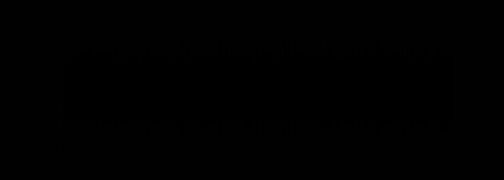

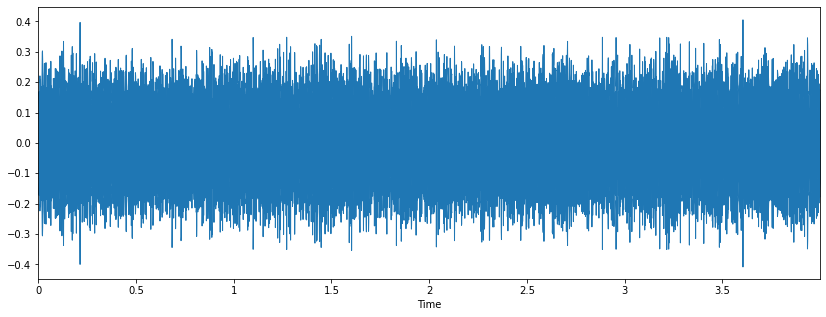

['100852-0-0-15.wav']
100852-0-0-15.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-15.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


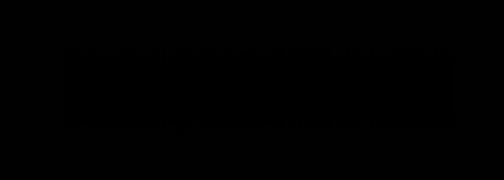

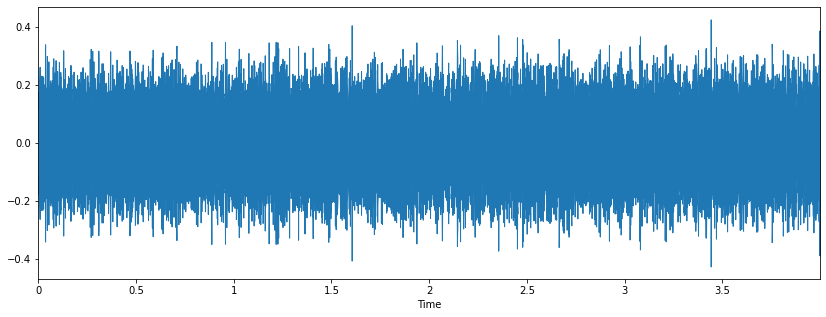

['100852-0-0-16.wav']
100852-0-0-16.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-16.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


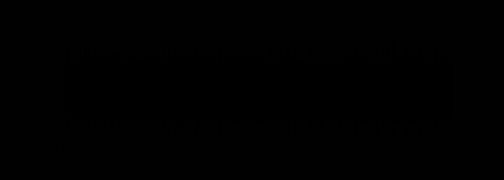

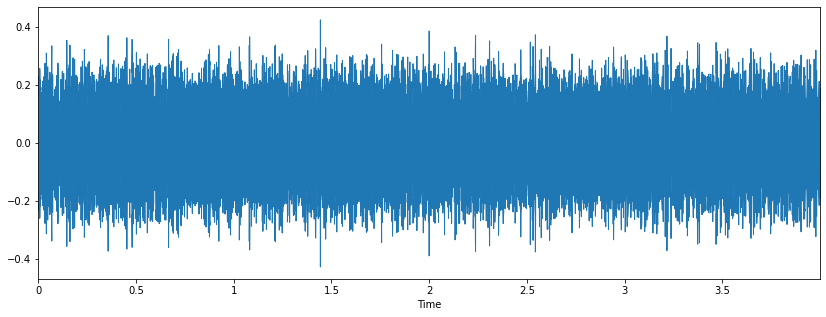

['100852-0-0-17.wav']
100852-0-0-17.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-17.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


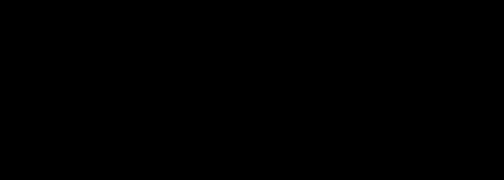

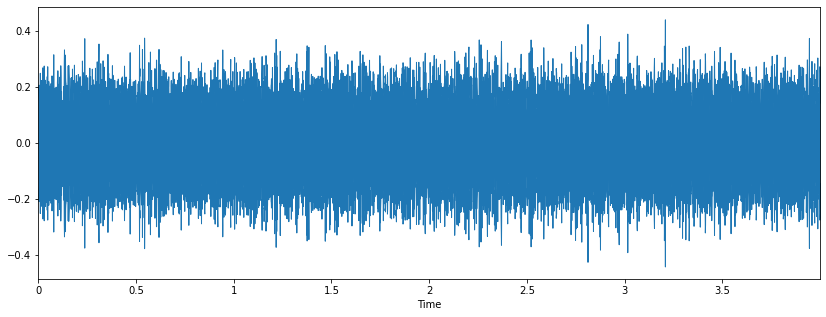

['100852-0-0-18.wav']
100852-0-0-18.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-18.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


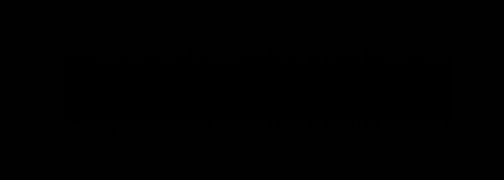

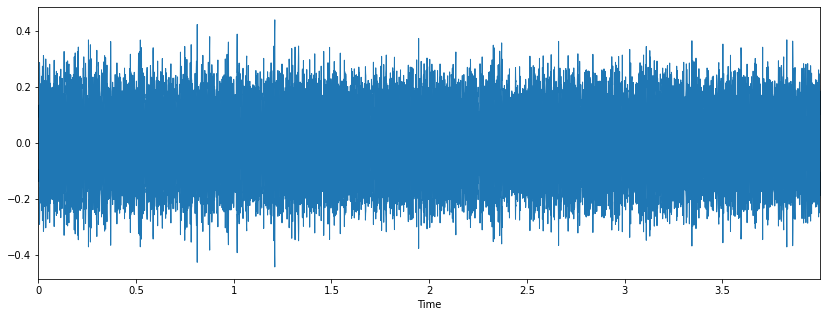

['100852-0-0-19.wav']
100852-0-0-19.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-19.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


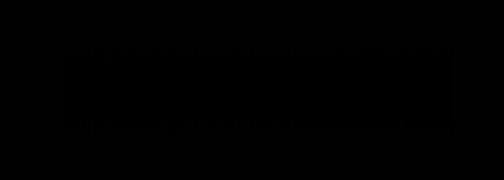

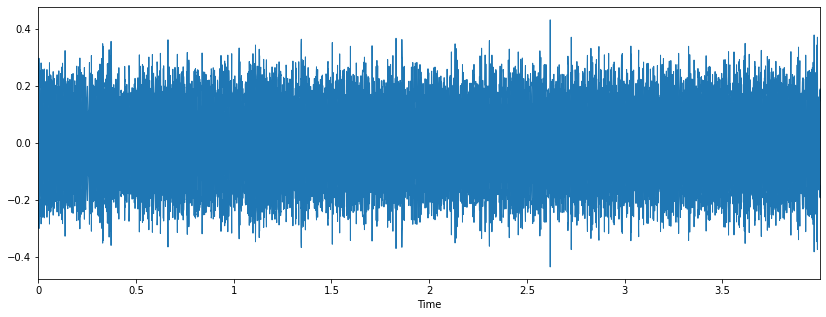

['100852-0-0-2.wav']
100852-0-0-2.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-2.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


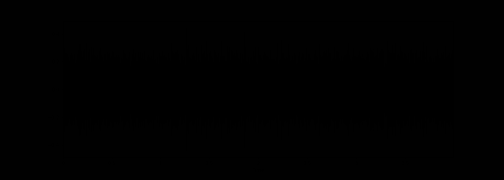

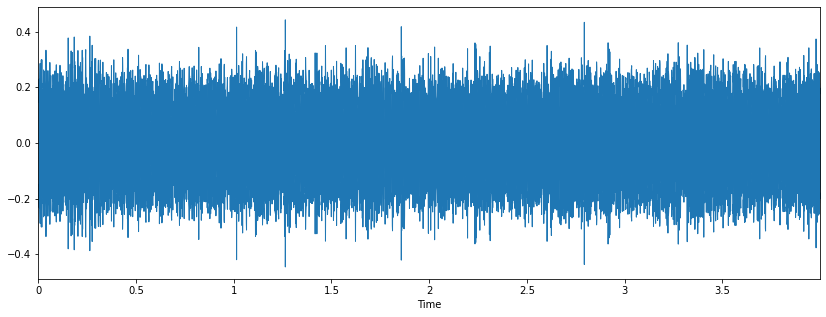

['100852-0-0-20.wav']
100852-0-0-20.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-20.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


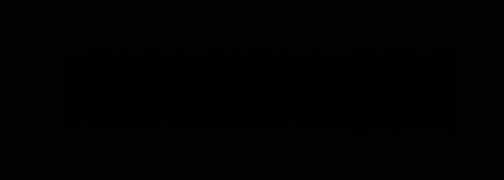

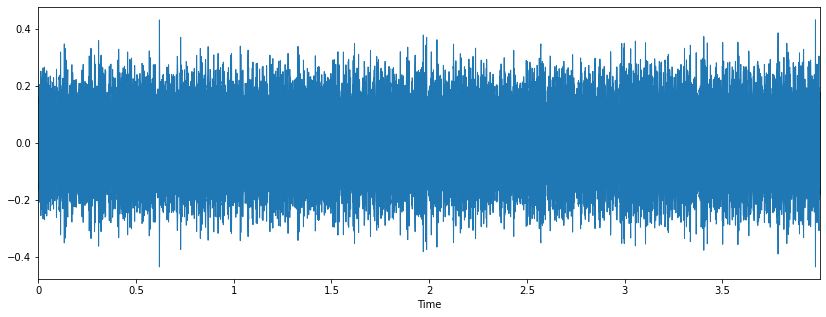

['100852-0-0-21.wav']
100852-0-0-21.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-21.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


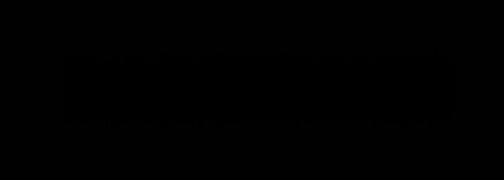

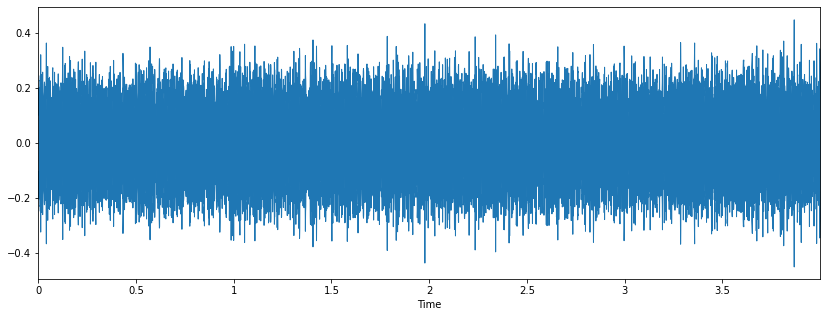

['100852-0-0-22.wav']
100852-0-0-22.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-22.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


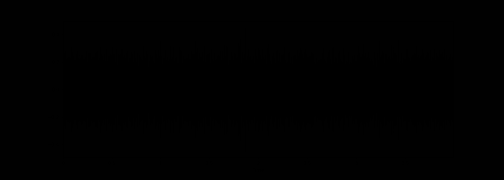

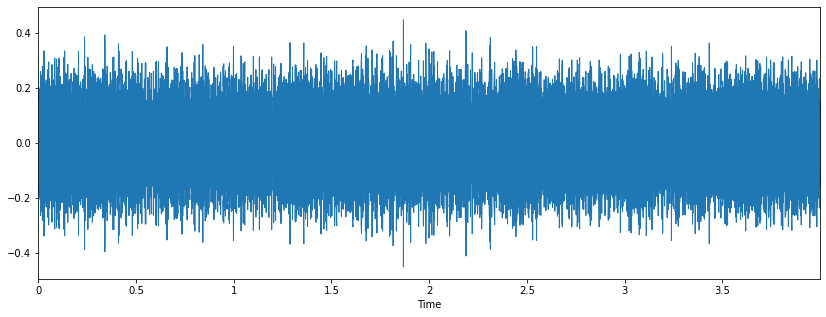

['100852-0-0-23.wav']
100852-0-0-23.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-23.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


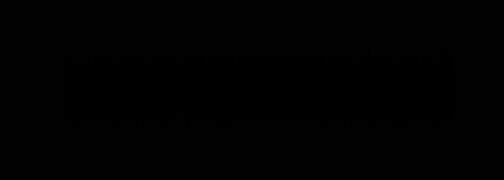

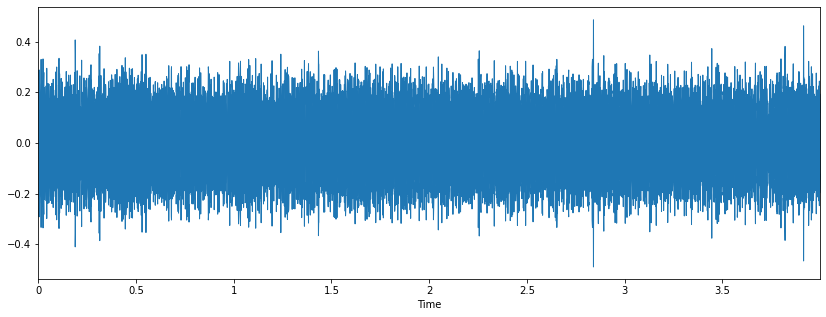

['100852-0-0-24.wav']
100852-0-0-24.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-24.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


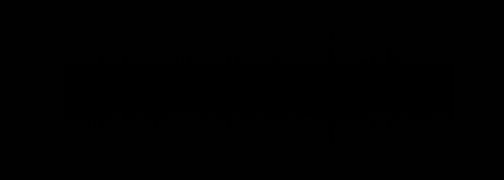

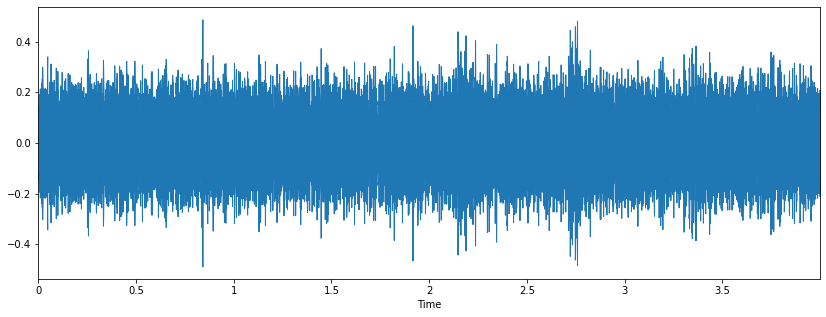

['100852-0-0-25.wav']
100852-0-0-25.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-25.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


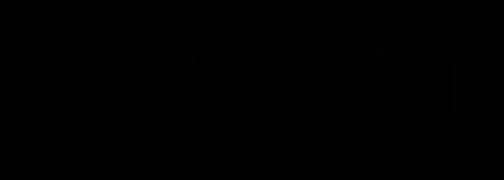

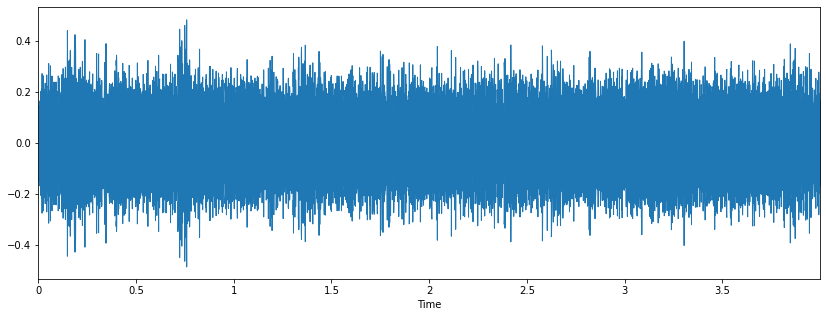

['100852-0-0-26.wav']
100852-0-0-26.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-26.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


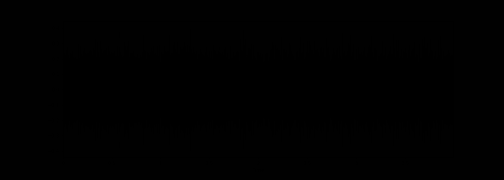

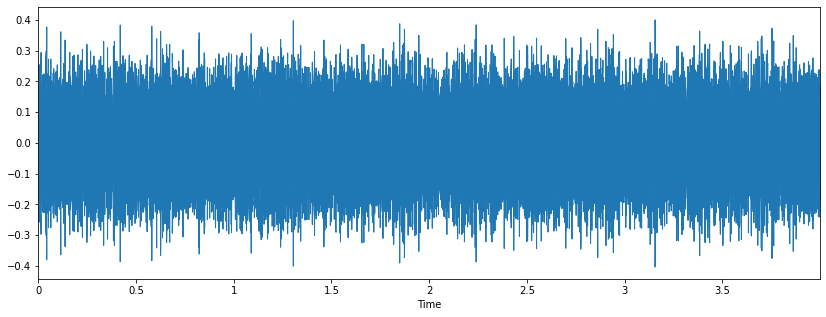

['100852-0-0-27.wav']
100852-0-0-27.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-27.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


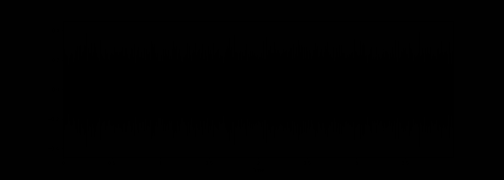

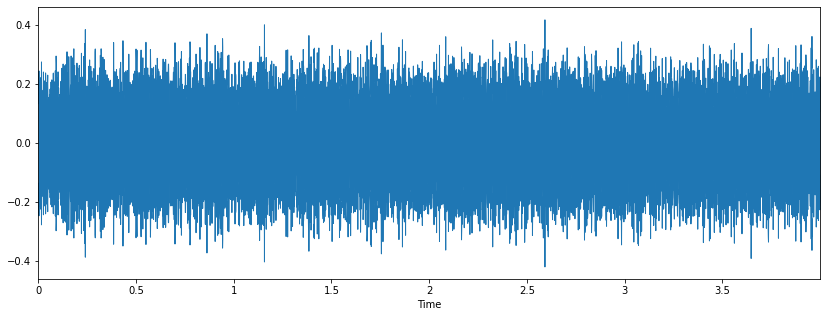

['100852-0-0-28.wav']
100852-0-0-28.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-28.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


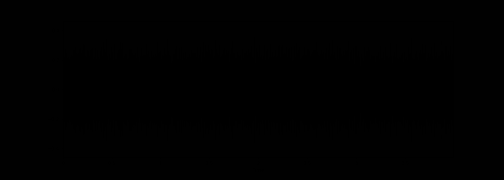

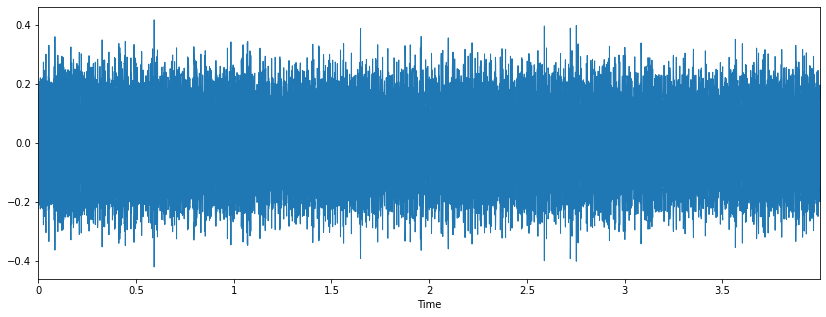

['100852-0-0-29.wav']
100852-0-0-29.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-29.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


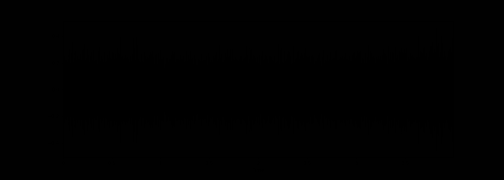

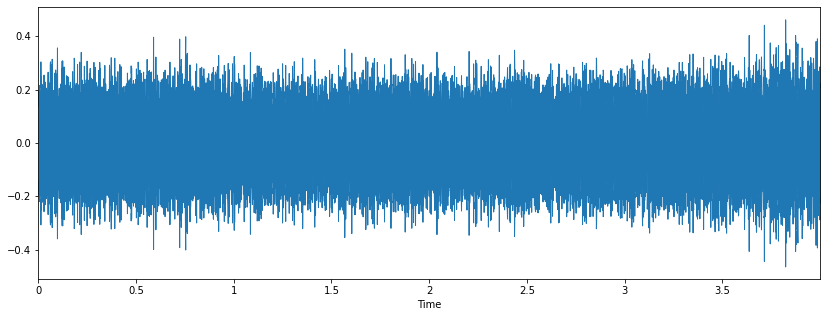

['100852-0-0-3.wav']
100852-0-0-3.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-3.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


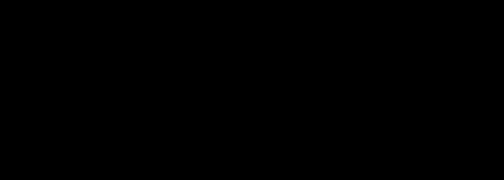

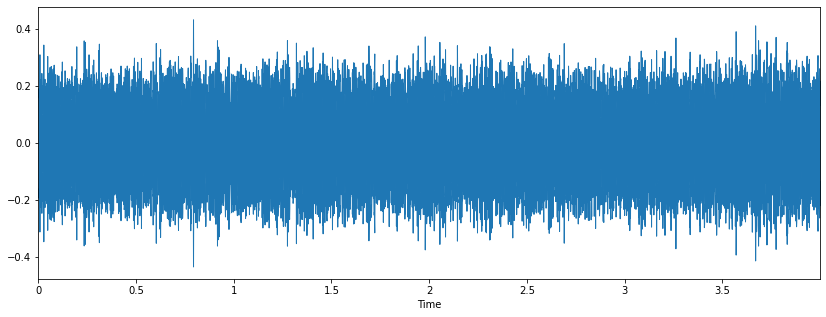

['100852-0-0-30.wav']
100852-0-0-30.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-30.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


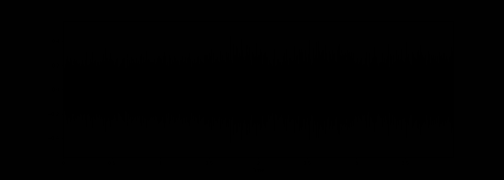

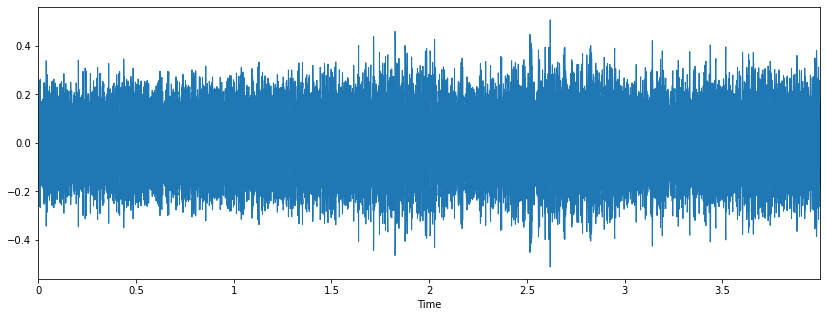

['100852-0-0-4.wav']
100852-0-0-4.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-4.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


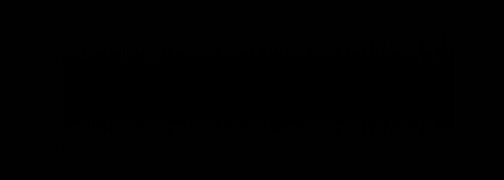

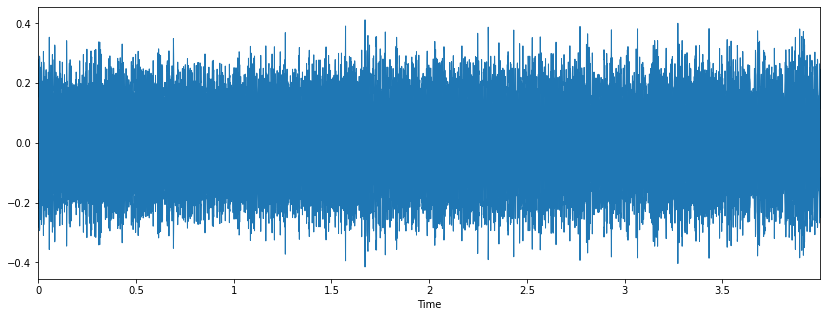

['100852-0-0-5.wav']
100852-0-0-5.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-5.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


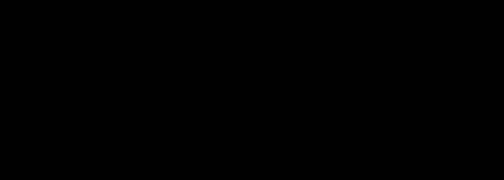

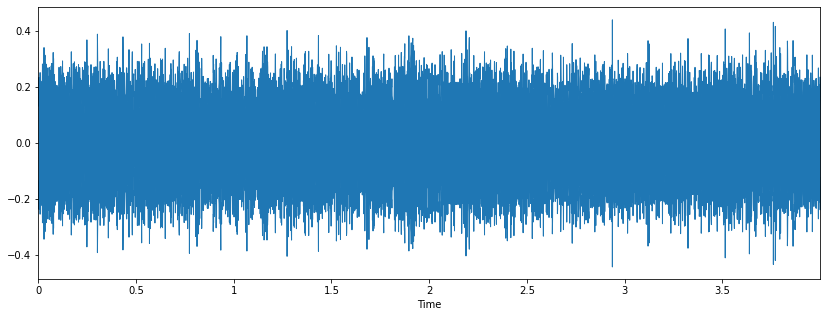

['100852-0-0-6.wav']
100852-0-0-6.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-6.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


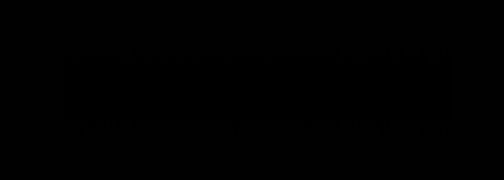

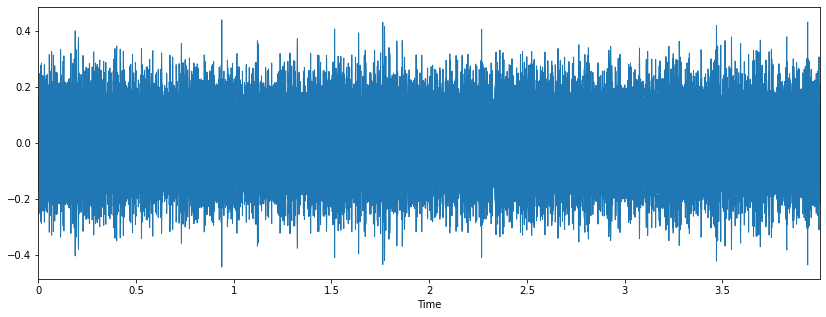

['100852-0-0-7.wav']
100852-0-0-7.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-7.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


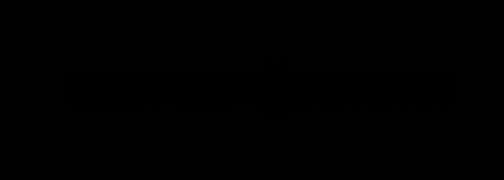

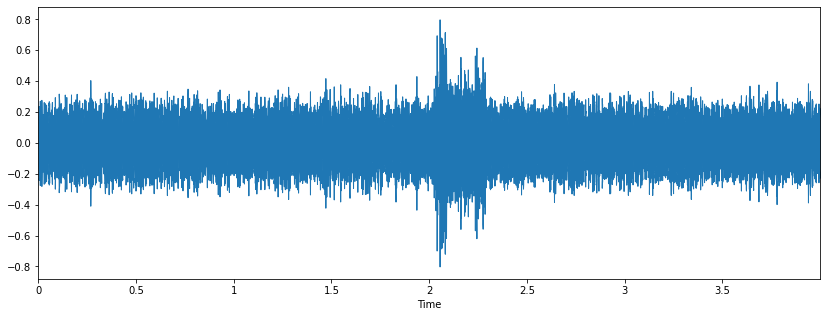

['100852-0-0-8.wav']
100852-0-0-8.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-8.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


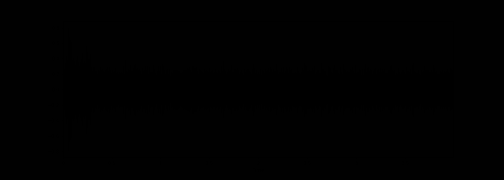

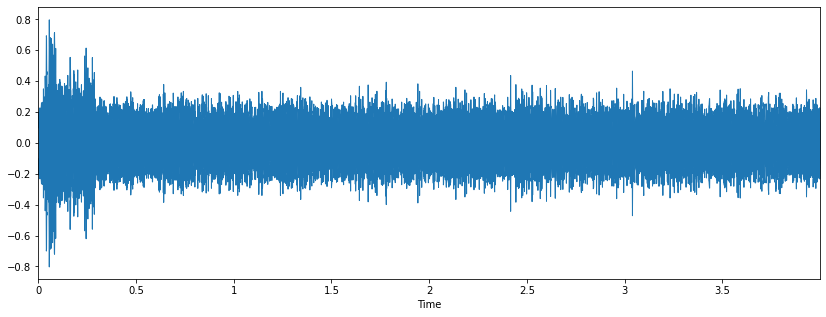

['100852-0-0-9.wav']
100852-0-0-9.wav
[5]
5
/content/UrbanSound8K/audio/fold5/100852-0-0-9.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


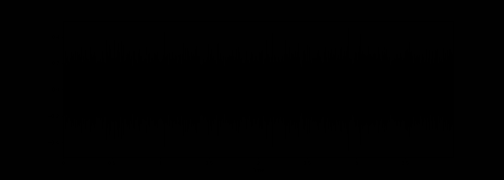

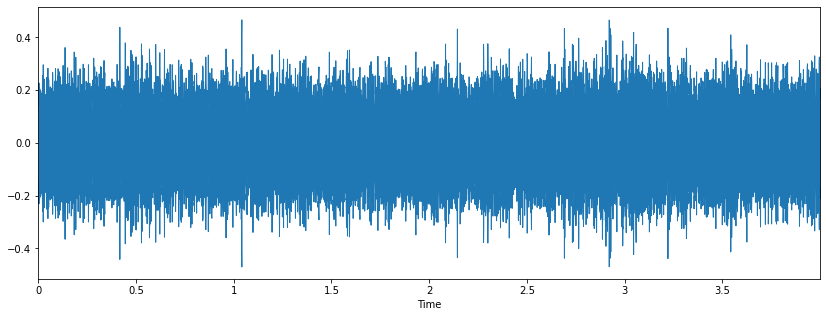

['101281-3-0-0.wav']
101281-3-0-0.wav
[6]
6
/content/UrbanSound8K/audio/fold6/101281-3-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


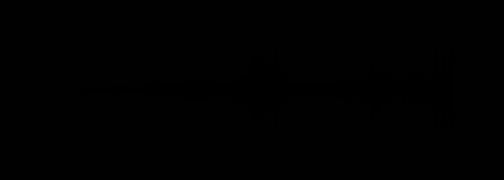

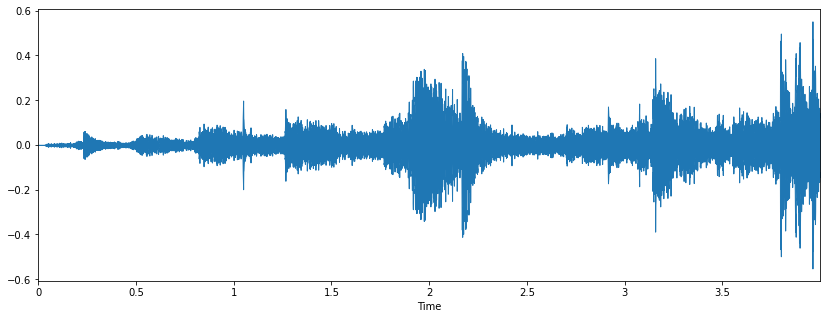

['101281-3-0-14.wav']
101281-3-0-14.wav
[6]
6
/content/UrbanSound8K/audio/fold6/101281-3-0-14.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


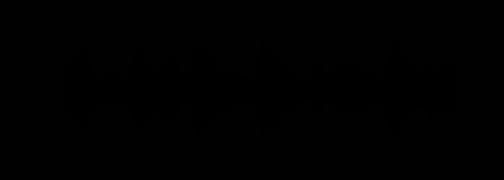

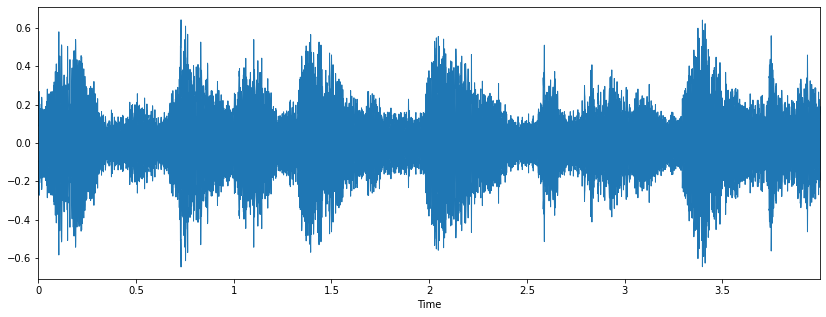

['101281-3-0-5.wav']
101281-3-0-5.wav
[6]
6
/content/UrbanSound8K/audio/fold6/101281-3-0-5.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


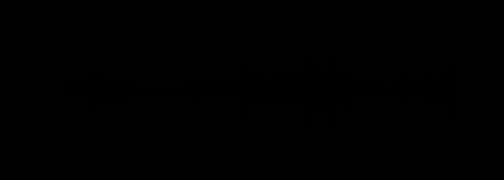

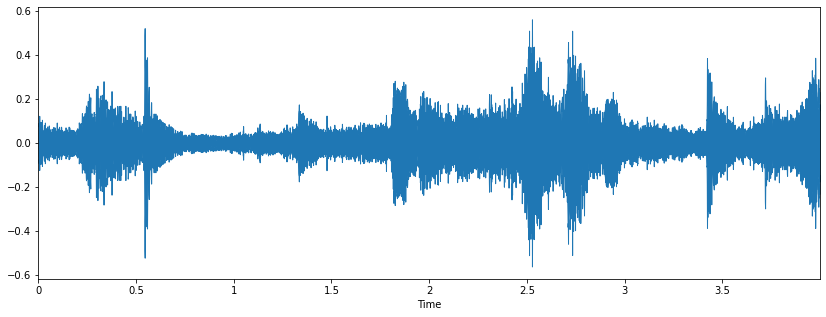

['101382-2-0-10.wav']
101382-2-0-10.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-10.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


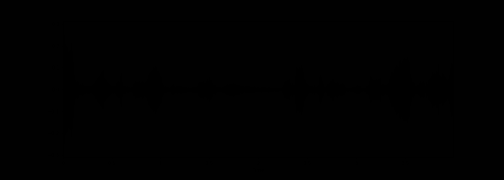

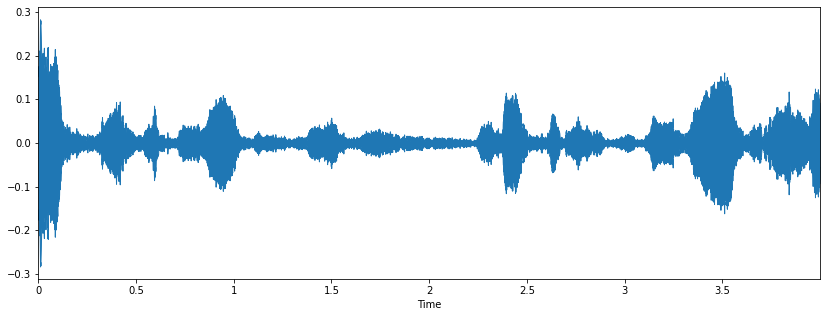

['101382-2-0-12.wav']
101382-2-0-12.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-12.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


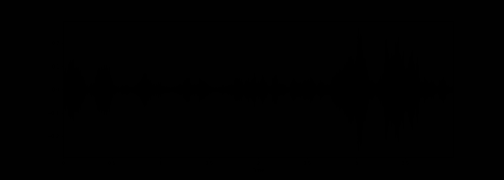

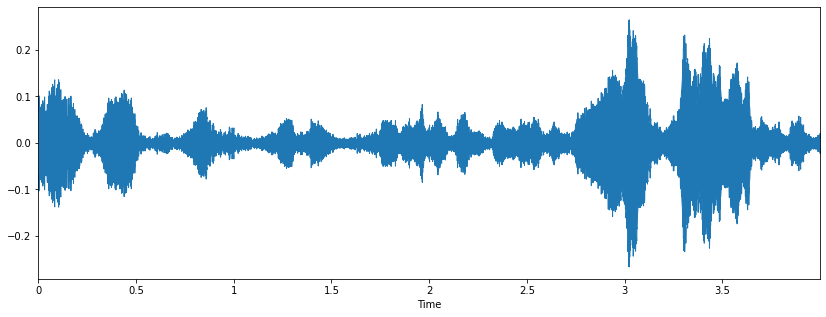

['101382-2-0-20.wav']
101382-2-0-20.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-20.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


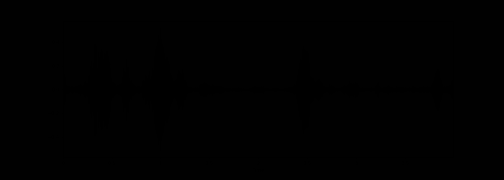

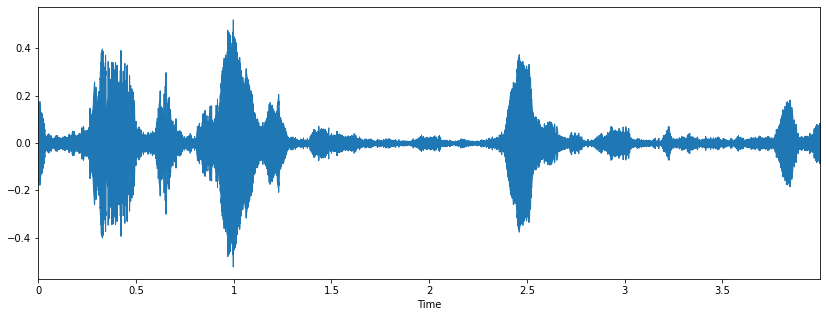

['101382-2-0-21.wav']
101382-2-0-21.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-21.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


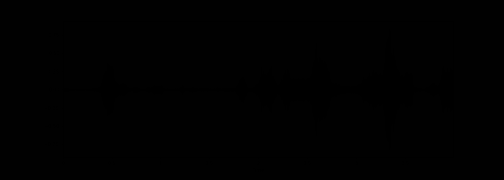

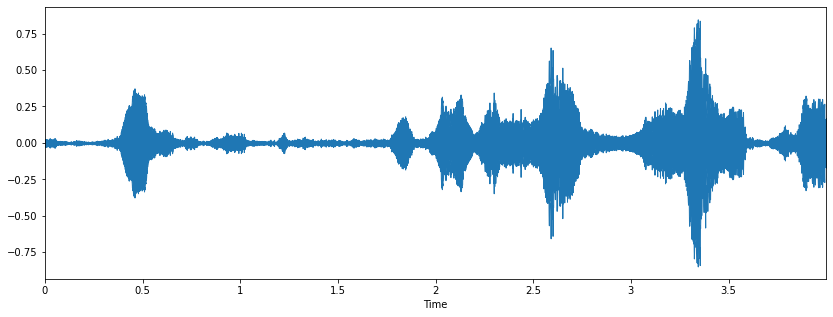

['101382-2-0-29.wav']
101382-2-0-29.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-29.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


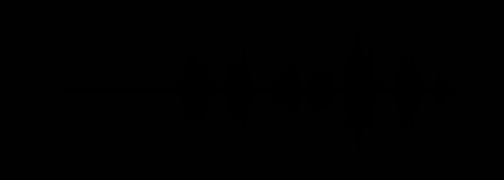

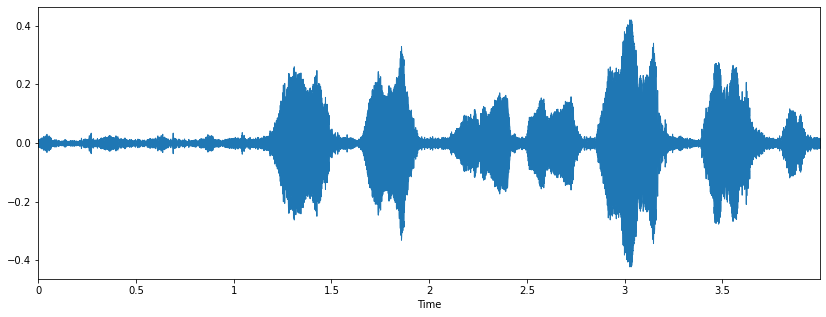

['101382-2-0-33.wav']
101382-2-0-33.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-33.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


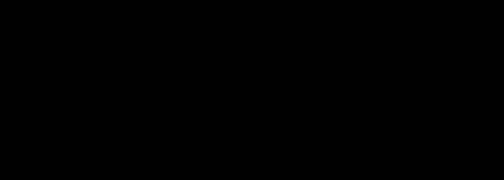

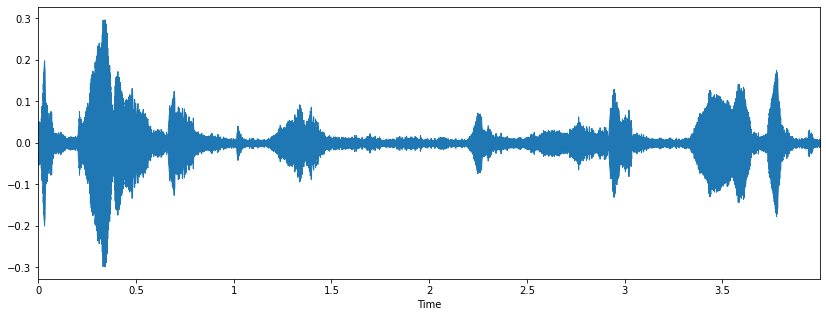

['101382-2-0-42.wav']
101382-2-0-42.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-42.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


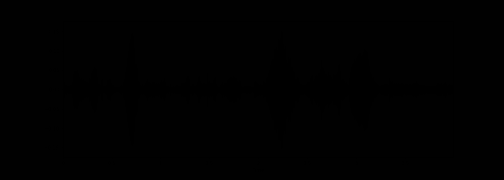

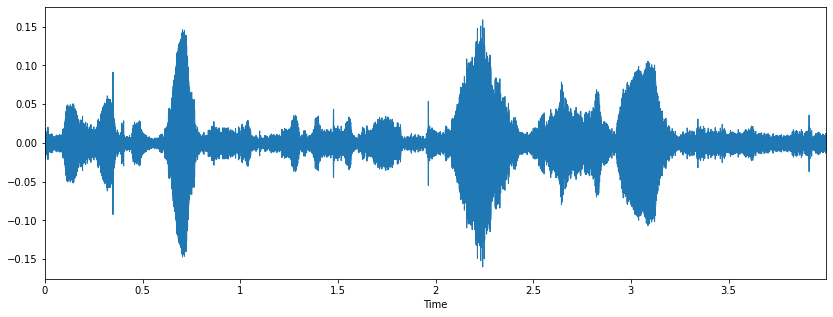

['101382-2-0-45.wav']
101382-2-0-45.wav
[10]
10
/content/UrbanSound8K/audio/fold10/101382-2-0-45.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


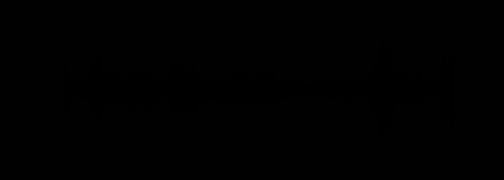

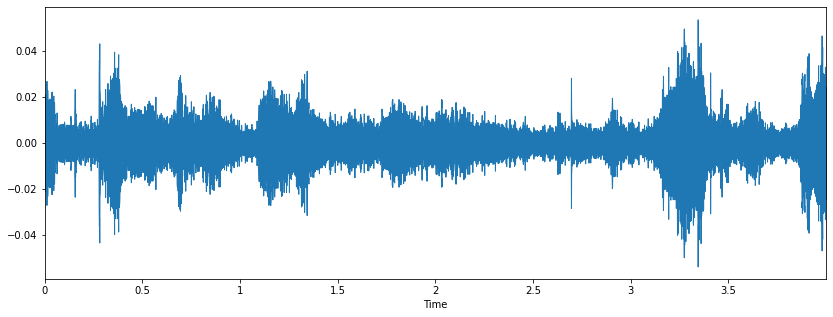

['101415-3-0-2.wav']
101415-3-0-2.wav
[1]
1
/content/UrbanSound8K/audio/fold1/101415-3-0-2.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


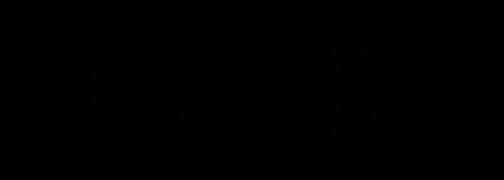

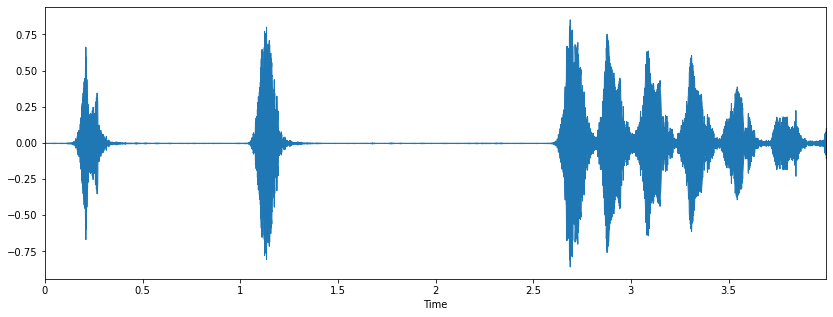

['101415-3-0-3.wav']
101415-3-0-3.wav
[1]
1
/content/UrbanSound8K/audio/fold1/101415-3-0-3.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


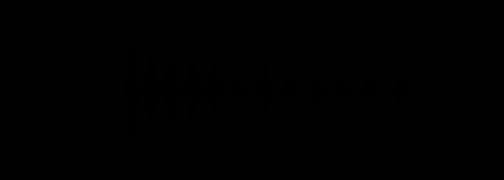

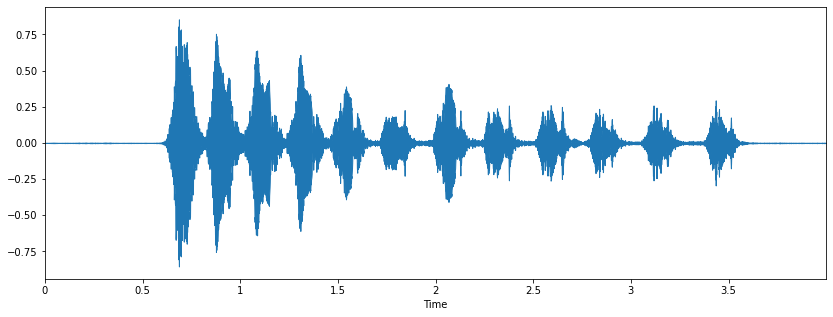

['101415-3-0-8.wav']
101415-3-0-8.wav
[1]
1
/content/UrbanSound8K/audio/fold1/101415-3-0-8.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


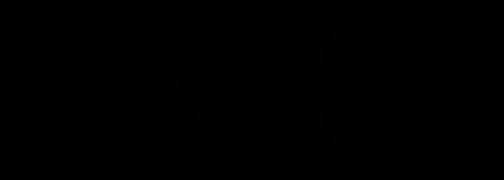

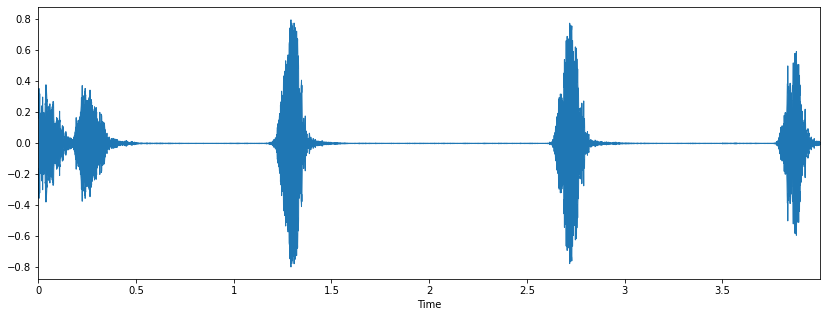

['101729-0-0-1.wav']
101729-0-0-1.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-1.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


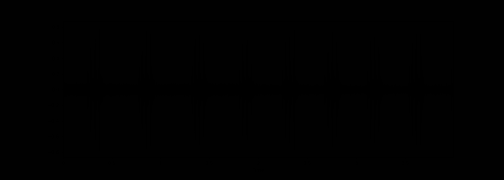

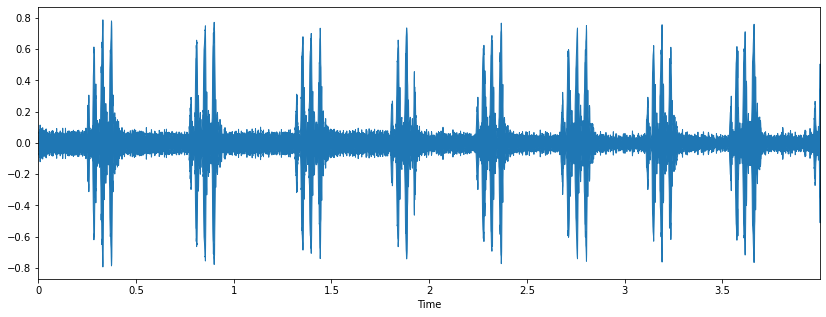

['101729-0-0-11.wav']
101729-0-0-11.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-11.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


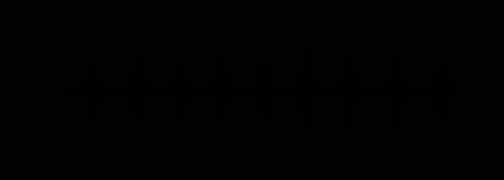

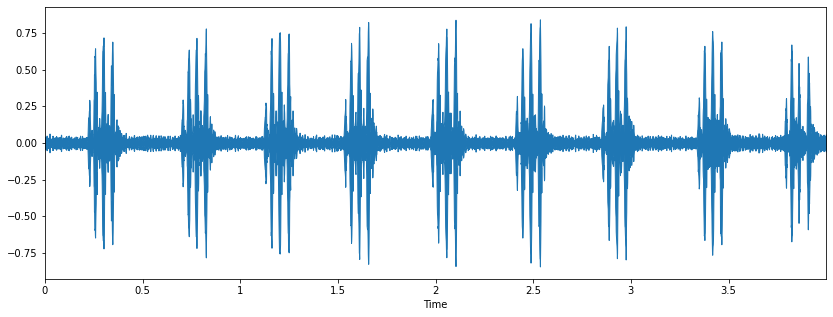

['101729-0-0-12.wav']
101729-0-0-12.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-12.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


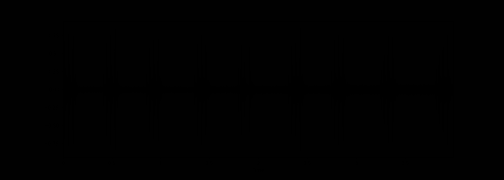

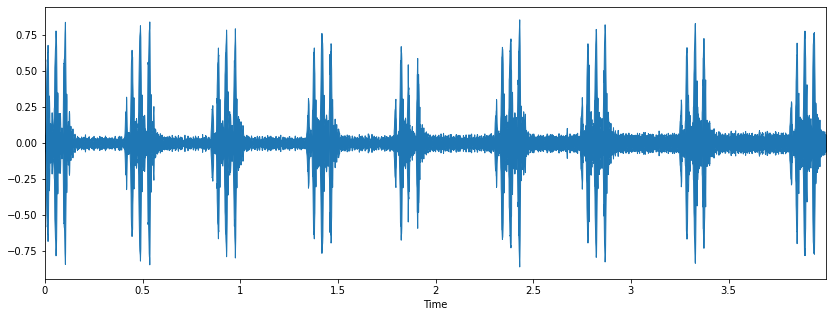

['101729-0-0-13.wav']
101729-0-0-13.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-13.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


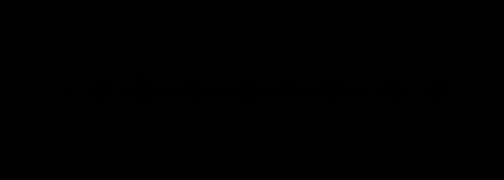

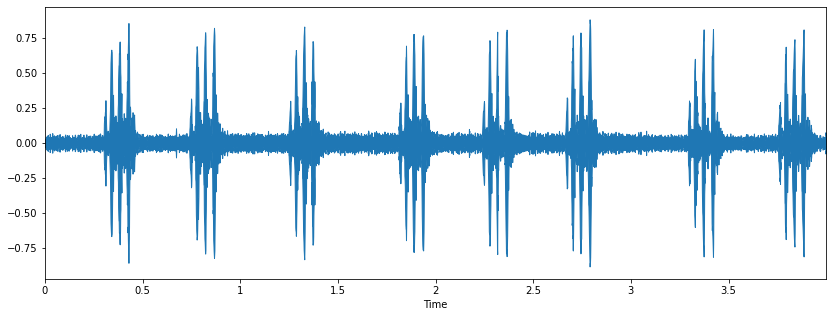

['101729-0-0-14.wav']
101729-0-0-14.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-14.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


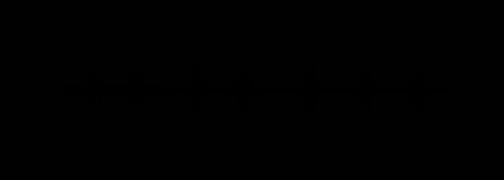

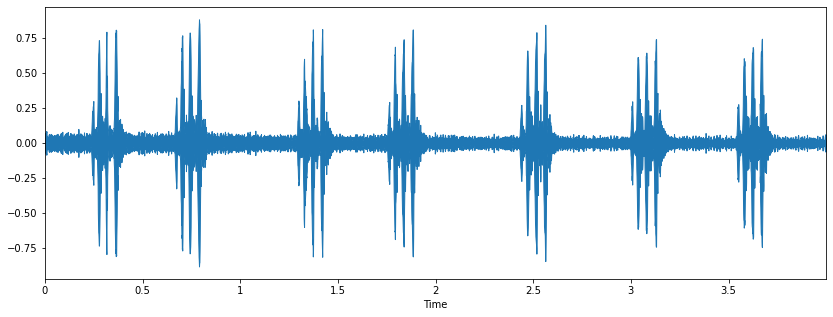

['101729-0-0-16.wav']
101729-0-0-16.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-16.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


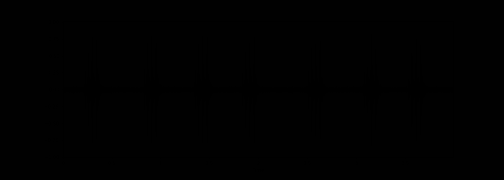

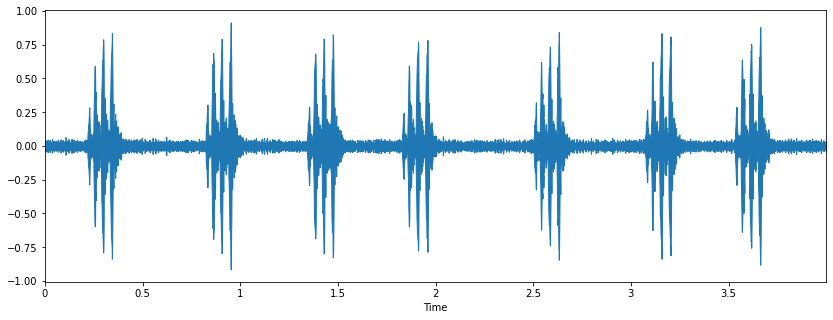

['101729-0-0-17.wav']
101729-0-0-17.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-17.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


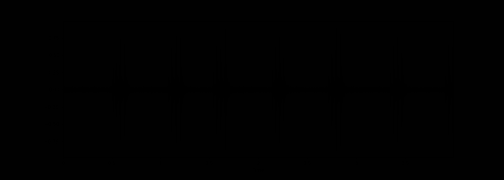

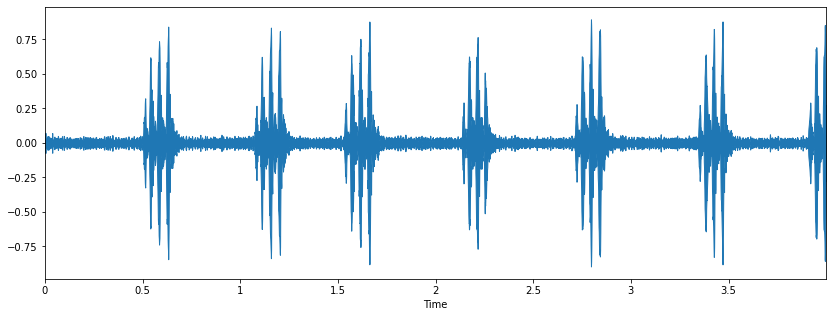

['101729-0-0-18.wav']
101729-0-0-18.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-18.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


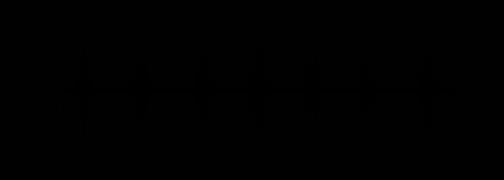

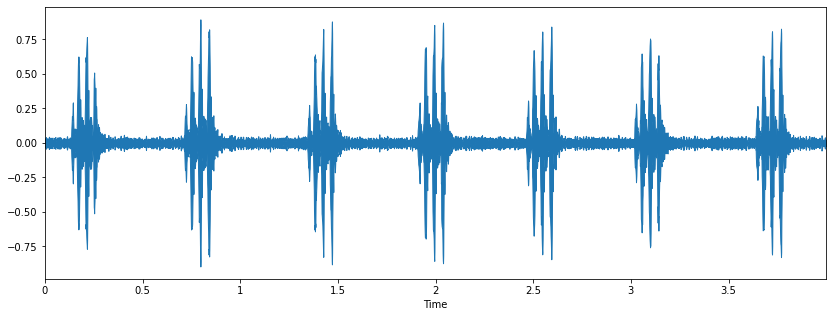

['101729-0-0-19.wav']
101729-0-0-19.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-19.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


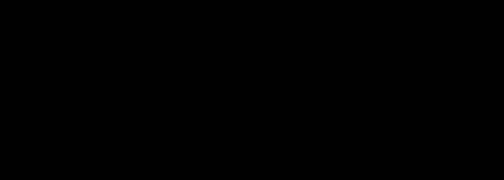

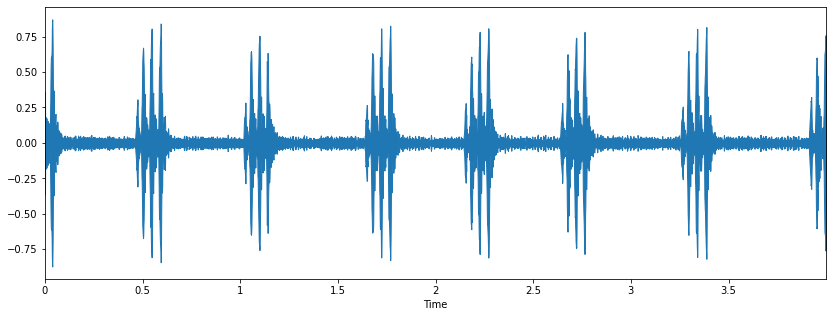

['101729-0-0-21.wav']
101729-0-0-21.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-21.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


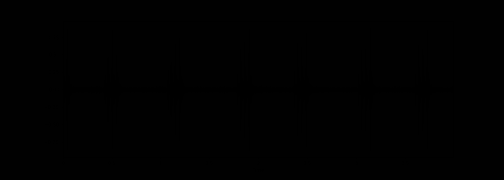

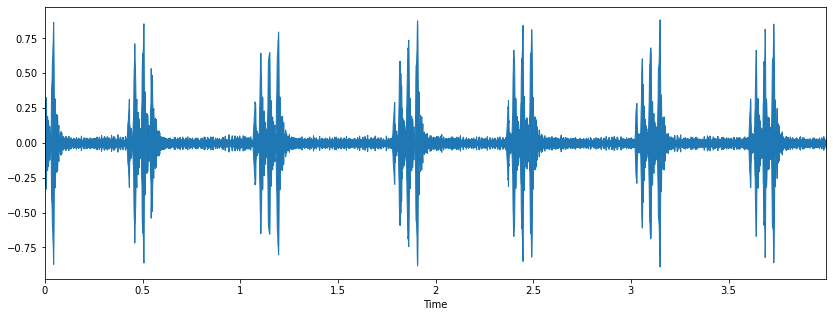

['101729-0-0-22.wav']
101729-0-0-22.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-22.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


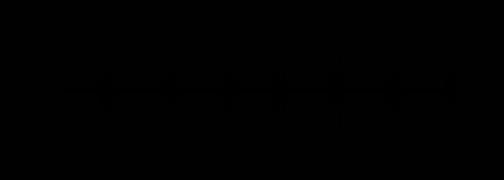

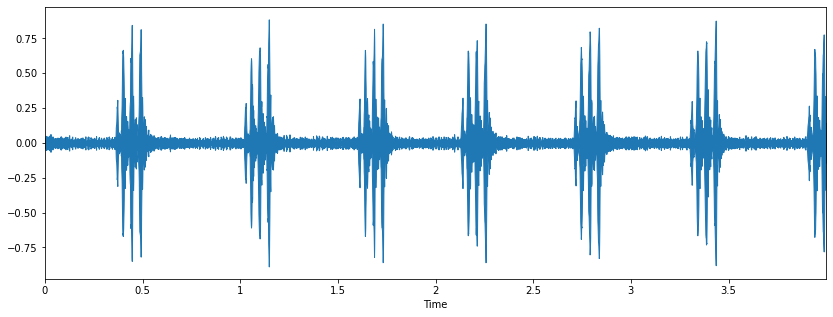

['101729-0-0-23.wav']
101729-0-0-23.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-23.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


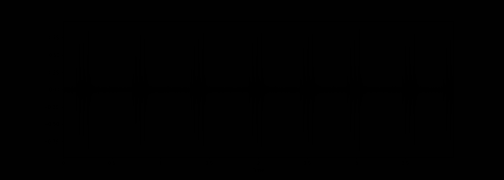

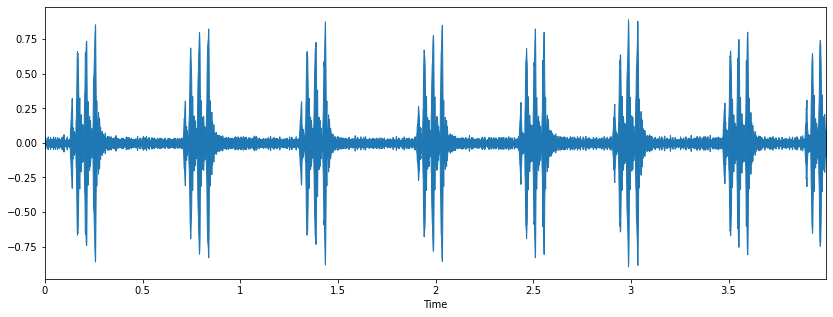

['101729-0-0-24.wav']
101729-0-0-24.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-24.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


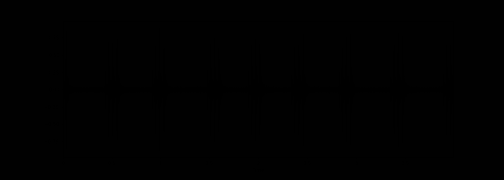

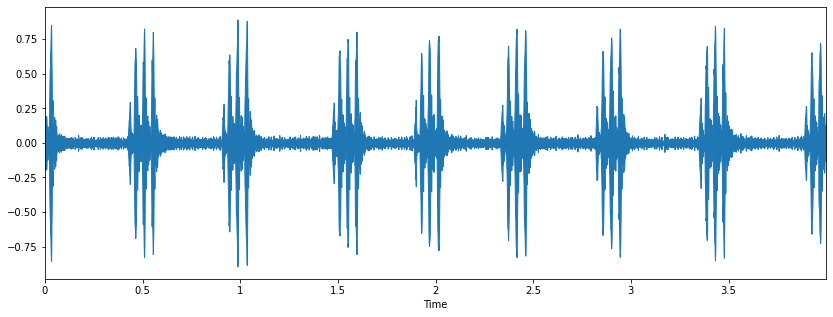

['101729-0-0-26.wav']
101729-0-0-26.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-26.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


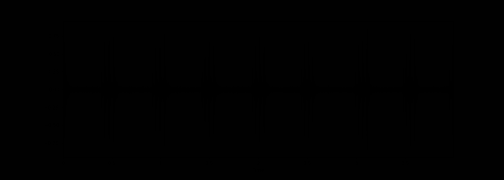

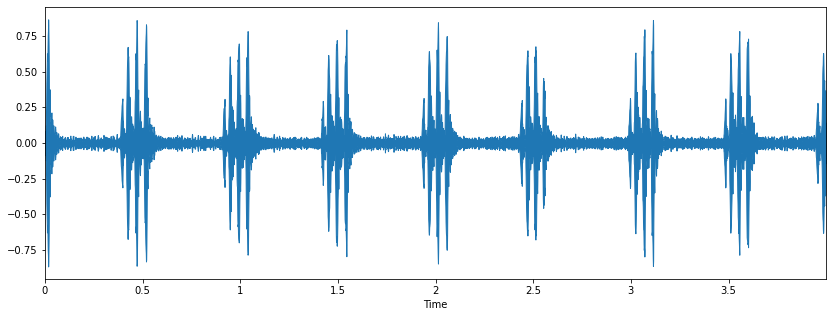

['101729-0-0-28.wav']
101729-0-0-28.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-28.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


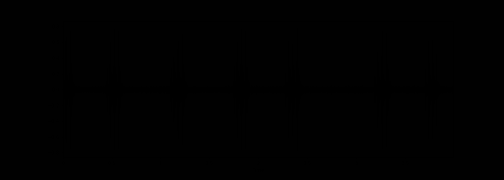

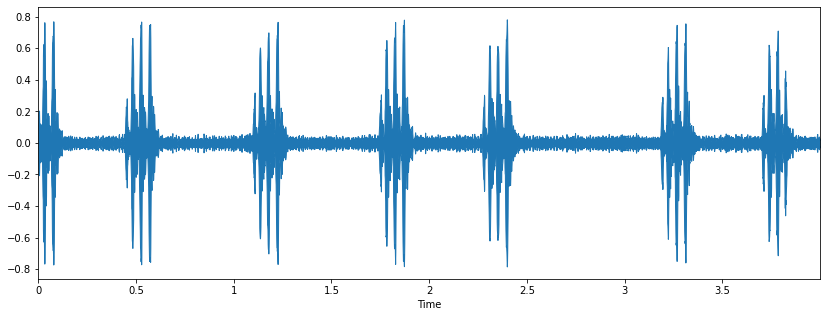

['101729-0-0-29.wav']
101729-0-0-29.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-29.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


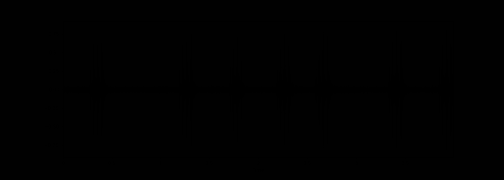

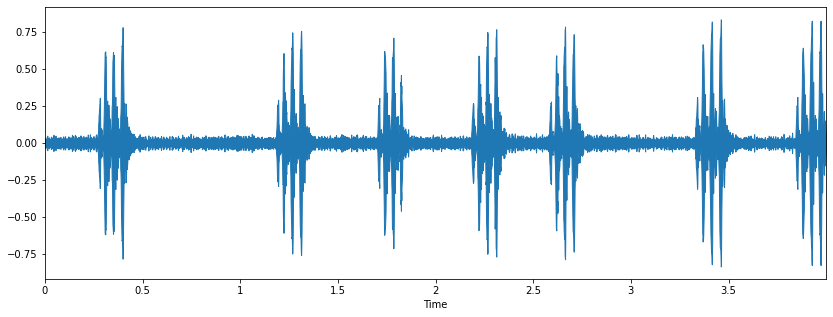

['101729-0-0-3.wav']
101729-0-0-3.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-3.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


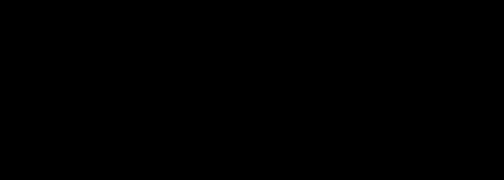

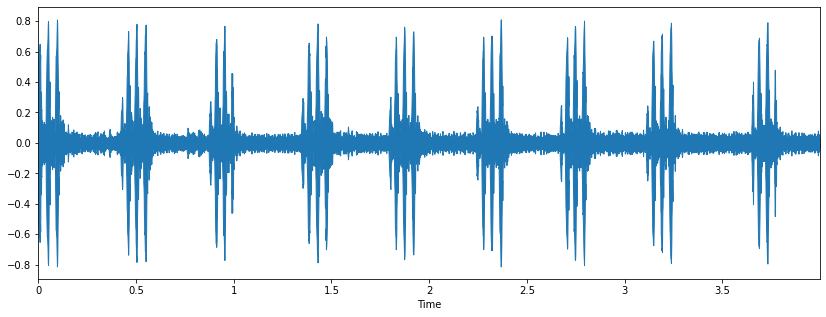

['101729-0-0-32.wav']
101729-0-0-32.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-32.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


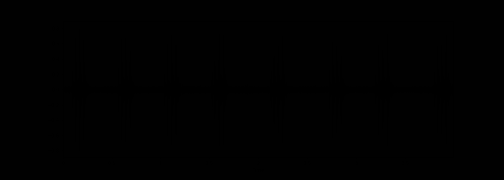

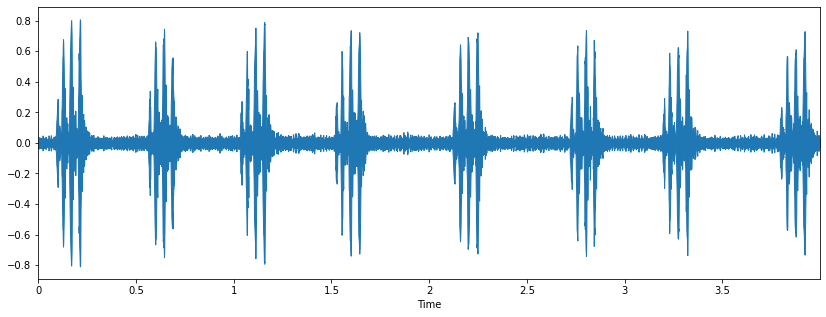

['101729-0-0-33.wav']
101729-0-0-33.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-33.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


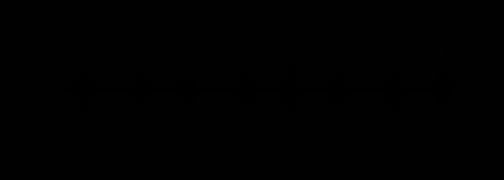

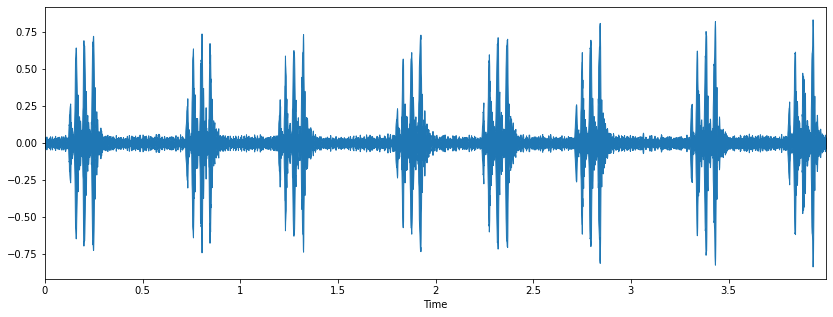

['101729-0-0-36.wav']
101729-0-0-36.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-36.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


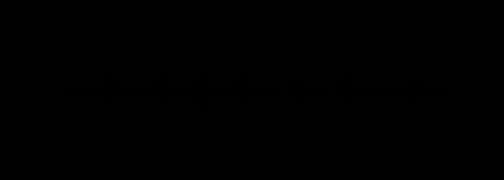

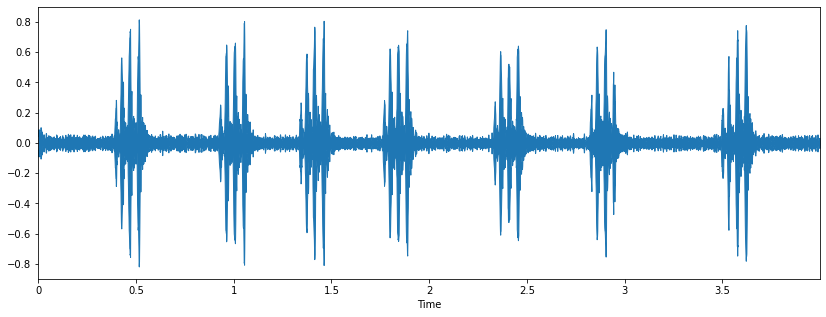

['101729-0-0-37.wav']
101729-0-0-37.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-37.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


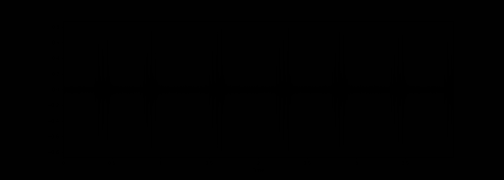

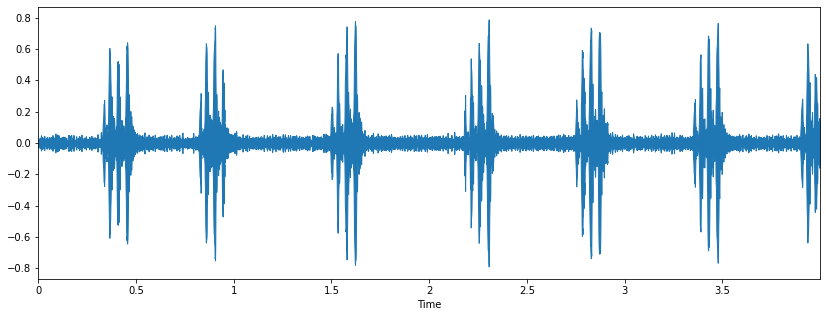

['101729-0-0-38.wav']
101729-0-0-38.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-38.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


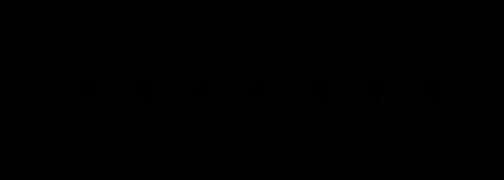

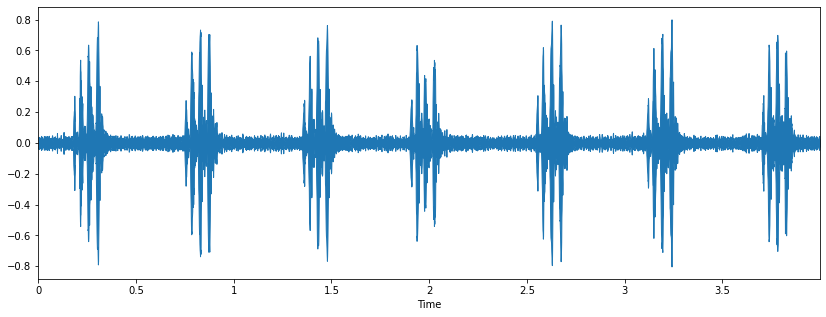

['101729-0-0-39.wav']
101729-0-0-39.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-39.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


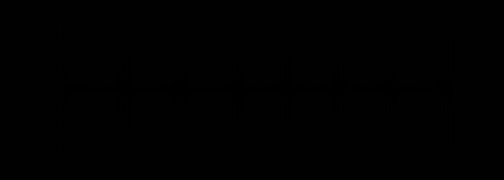

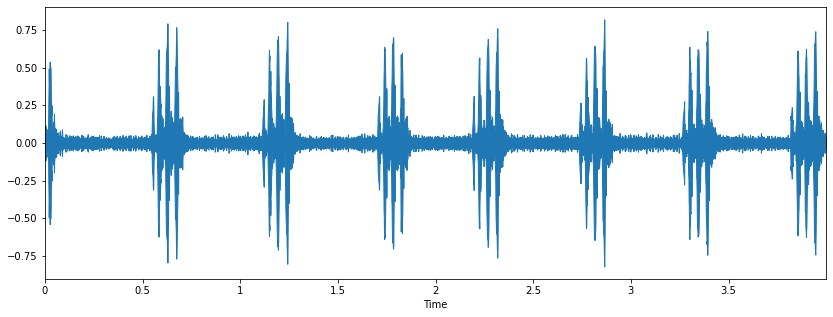

['101729-0-0-4.wav']
101729-0-0-4.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-4.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


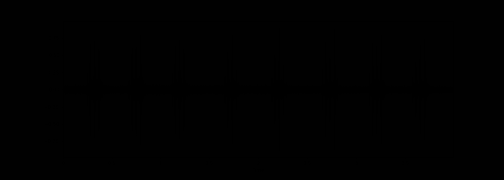

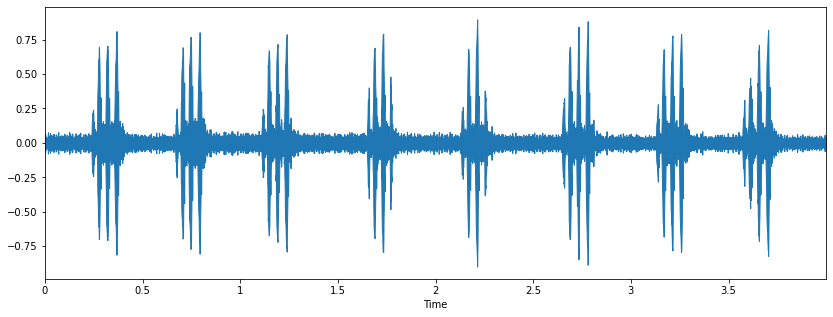

['101729-0-0-40.wav']
101729-0-0-40.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-40.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


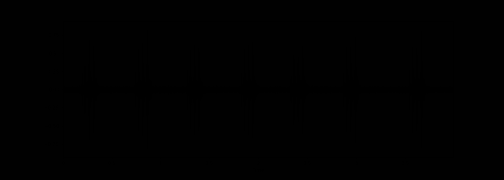

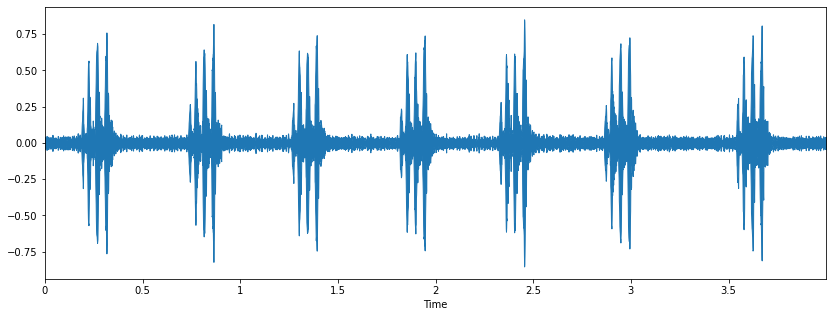

['101729-0-0-6.wav']
101729-0-0-6.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-6.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


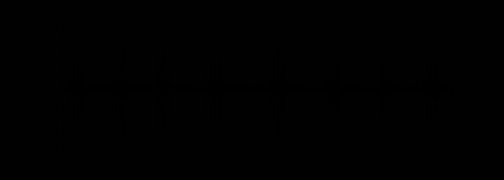

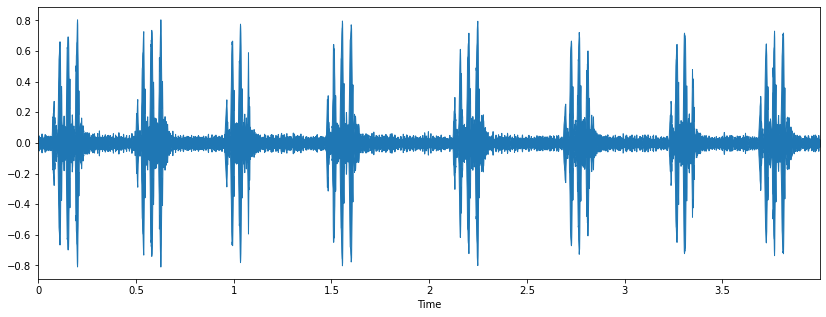

['101729-0-0-9.wav']
101729-0-0-9.wav
[9]
9
/content/UrbanSound8K/audio/fold9/101729-0-0-9.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


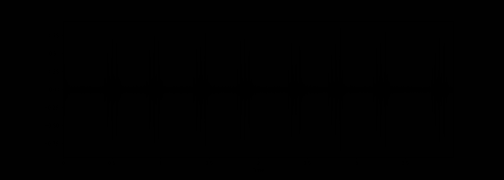

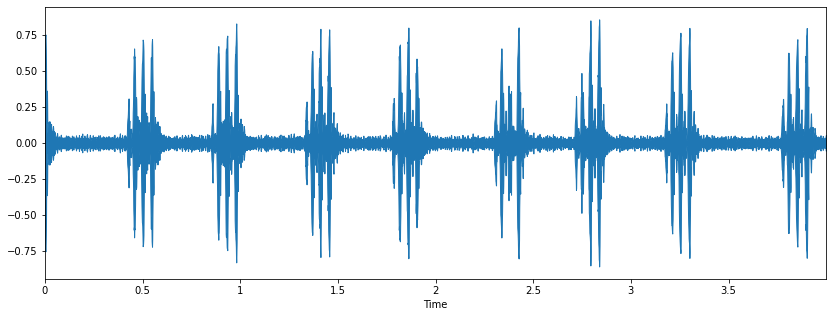

['101848-9-0-0.wav']
101848-9-0-0.wav
[7]
7
/content/UrbanSound8K/audio/fold7/101848-9-0-0.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


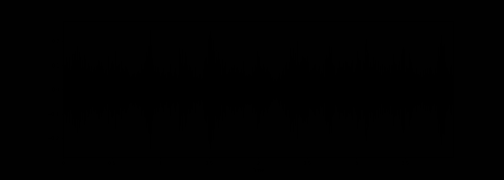

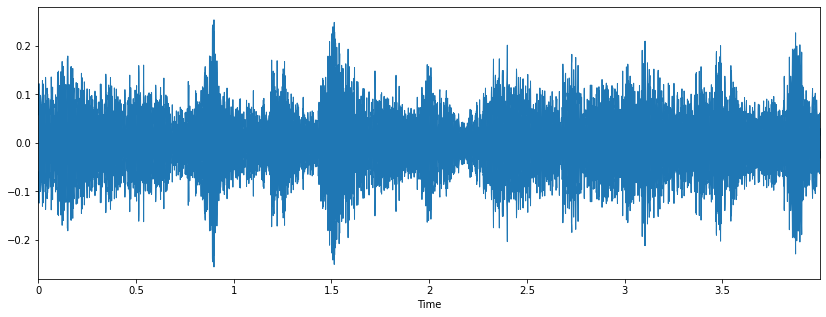

['101848-9-0-1.wav']
101848-9-0-1.wav
[7]
7
/content/UrbanSound8K/audio/fold7/101848-9-0-1.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


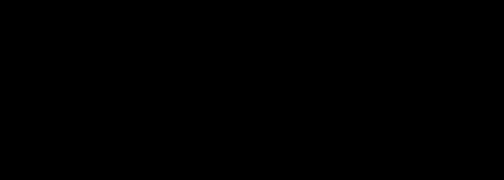

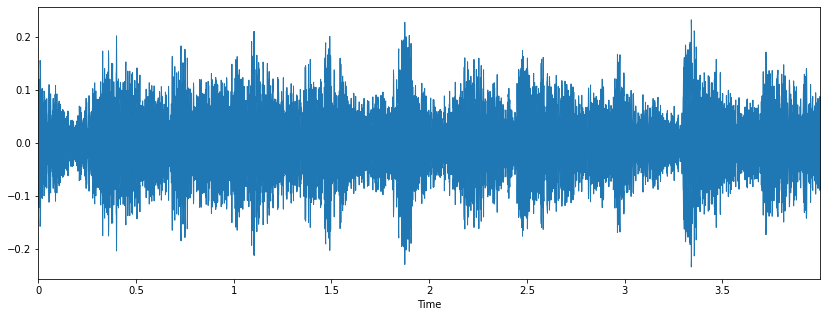

['101848-9-0-2.wav']
101848-9-0-2.wav
[7]
7
/content/UrbanSound8K/audio/fold7/101848-9-0-2.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


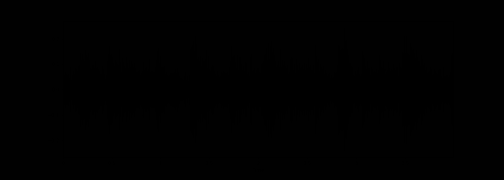

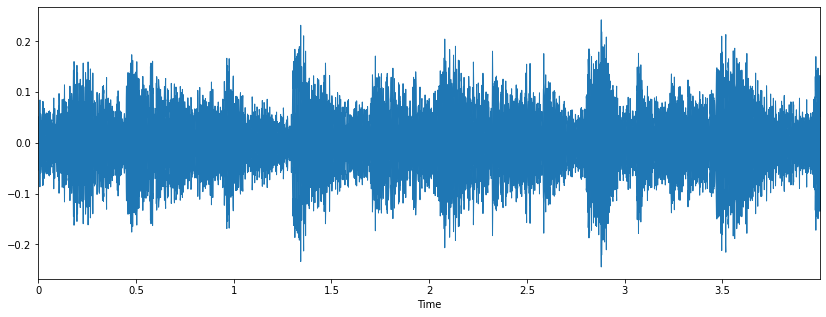

['101848-9-0-3.wav']
101848-9-0-3.wav
[7]
7
/content/UrbanSound8K/audio/fold7/101848-9-0-3.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


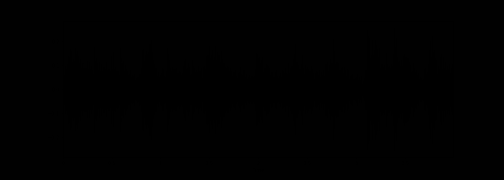

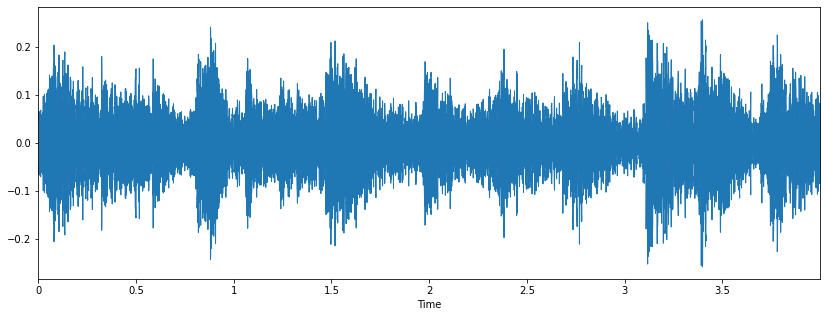

['101848-9-0-8.wav']
101848-9-0-8.wav
[7]
7
/content/UrbanSound8K/audio/fold7/101848-9-0-8.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


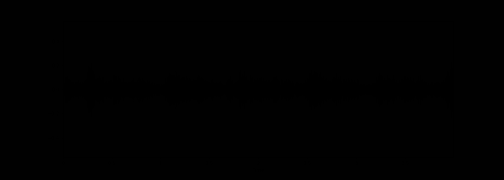

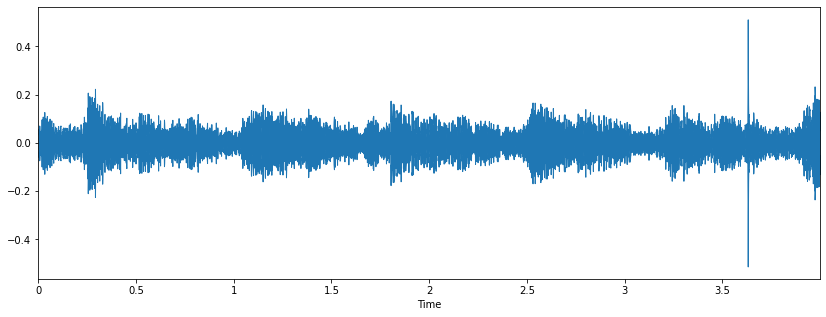

['101848-9-0-9.wav']
101848-9-0-9.wav
[7]
7
/content/UrbanSound8K/audio/fold7/101848-9-0-9.wav
<class 'numpy.ndarray'> <class 'int'>
(88200,) 22050


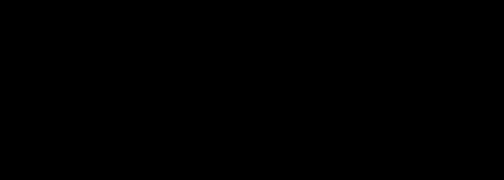

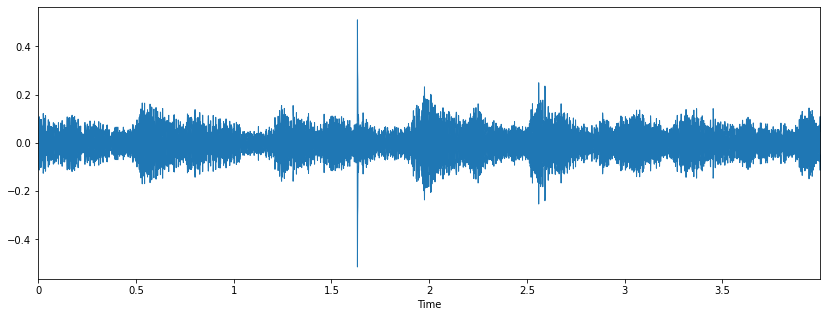

In [5]:
#her fold içindeki tüm classID'ler ile işlem yapar
i = 0
file_name = ''
fold = ''
dosya_yolu =''
audio_data = ''

liste_ikili = []
while i < 100:
  a = '/content/UrbanSound8K/audio/fold'
  if(fold_name.values[i]!=-1):
    dosya_isim = slice_name.values[i]
    print(dosya_isim)
    dosya_isim1 = dosya_isim[0]
    print(dosya_isim1)

    fold_isim = fold_name.values[i]
    print(fold_isim)
    fold = str(fold_isim[0])
    print(fold)


    audio_data = '/content/UrbanSound8K/audio/fold'+fold+'/'+dosya_isim1
    print(audio_data)
    x , sr = librosa.load(audio_data)
    print(type(x), type(sr))
    print(x.shape, sr)
    librosa.load(audio_data, sr=44100)
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)

    n = i
    n =str(n)
    file_name = '/content/gorsel/gorsel'+n+'.png'
    plt.savefig(file_name)
    

    #listeye eleman ekleme
    etiket_eleman = classID_name.values[i]
    etiket.append(etiket_eleman[0])


    #gorntu isleme
    image = cv2.imread (file_name)
    gray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)
    w = int(gray.shape[1]/2)
    h = int(gray.shape[0]/2)
    resize = cv2.resize(gray, (w, h), interpolation= cv2.INTER_LINEAR)
    yeni_image = cv2.normalize(resize,None,0,1,cv2.NORM_MINMAX)

    opencv_isim = '/content/opencv_gorsel/gorsel'+n+'.png'
    cv2.imwrite(opencv_isim, yeni_image)
    cv2_imshow(yeni_image)

    ekle_goruntu = cv2.imread(opencv_isim)
    goruntu.append(ekle_goruntu)

    liste_ekleme.append(ekle_goruntu)
    liste_ekleme.append(etiket_eleman[0])
    liste_ikili.append(liste_ekleme)
    liste_ekleme = []



    n = int(n)
    plt.show()
  i+=1

In [ ]:
print(liste_ikili)

In [6]:
#verileri parçalamak
liste_numpy = np.array(liste_ikili)
X = liste_numpy[:,0]
Y = liste_numpy[:,1]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


((70,), (30,), (70,), (30,))

In [7]:
x_train_uzunluk_yarisi = int(len(x_train)/2)
y_train_uzunluk_yarisi = int(len(y_train)/2)
print("x_train uzunluk  :  ",x_train_uzunluk_yarisi,"\n")
print("y_train uzunluk  :  ",y_train_uzunluk_yarisi,"\n")
x_train = x_train.reshape(x_train_uzunluk_yarisi,2)
y_train = y_train.reshape(y_train_uzunluk_yarisi,2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

x_train uzunluk  :   35 

y_train uzunluk  :   35 



((35, 2), (30,), (35, 2), (30,))

In [8]:
#model eğitimi
model = tf.keras.Sequential()

#giriş katman
input_layer = tf.keras.layers.Dense(4096, input_dim=7,activation='relu')
model.add(input_layer)

#gizli katman
model.add(tf.keras.layers.Dense(4096, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

#çıkış katmanı
model.add(tf.keras.layers.Dense(7,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.add(tf.keras.layers.Flatten())

results = model.fit(x_train, y_train, epochs=10)

ValueError: ignored

Deneme Amaçlı

In [ ]:
#dosyaları ziple
!zip -r opencv.zip '/content/opencv_gorsel'

In [ ]:
#liste uzunluğu
print(type(liste_ikili))
print(len(liste_ikili))

<class 'list'>
100


In [ ]:
y_train = np.int32(y_train)
type(x_train.shape)
x_train.shape

(35, 2)

In [ ]:
print(type(X))
print(type(Y))
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

print(len(X))
print(len(Y))
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

In [ ]:
brbrt = []
sdfvd = []

for ddd in range(10):
  a343 = ddd+2
  brbrt.append(ddd)
  brbrt.append(a343)
  sdfvd.append(brbrt)
  brbrt = []

print(sdfvd)

[[0, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7], [6, 8], [7, 9], [8, 10], [9, 11]]


In [ ]:
print(len(sdfvd))

10


In [ ]:

array = np.array(sdfvd) 
print(array)
print(len(array))
print(type(array))
X = array[:,0]
y = array[:,1]
print(X)
print(len(X))
print(type(X))
print(Y)
print(len(Y))
print(type(Y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

[[ 0  2]
 [ 1  3]
 [ 2  4]
 [ 3  5]
 [ 4  6]
 [ 5  7]
 [ 6  8]
 [ 7  9]
 [ 8 10]
 [ 9 11]]
10
<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]
10
<class 'numpy.ndarray'>
[3 2 2 2 2 2 2 2 2 1 1 1 1 1 3 3 3 3 3 3]
20
<class 'numpy.ndarray'>


((7,), (3,))